# Final Project Submission

Please fill out:

* Student name: Elsie chieng, Richard, Taracha, Cindy King'ori, Peter Muthoma
* Student pace: Part time
* Scheduled project review data/time: 11/09/2023, 6:00am
* Instructor name:Ms. Asha Deen
* Blog post URL:

# <font color='goldenrod'> King County House Sales Regression Analysis

![Image Alt Text](https://image.slidesdocs.com/responsive-images/background/city-building-estate-real-sales-home-urban-powerpoint-background_0316dc0da1__960_540.jpg)

## <font color='goldenrod'> Project Overview
This project revolves around employing multiple linear regression modeling to scrutinize real estate transactions within a northwestern county.

## <font color='goldenrod'> Business Problem
Our chosen stakeholder for this project is a real estate agency specializing in assisting homeowners with buying and selling properties. The pressing business problem centers on the agency's need to provide homeowners with informed guidance on how specific home renovations can potentially enhance the estimated value of their properties and the extent of such improvements.

**Stakeholders:**
The primary stakeholders in this project are:
1. **Homeowners:** They seek guidance on increasing the value of their homes through renovations.
2. **Real Estate Agency:** The agency is keen on offering valuable advice to homeowners and facilitating property transactions.

This analysis aims to empower homeowners with data-driven insights to make informed decisions regarding property renovations and, in turn, support the real estate agency in providing expert guidance to its clients

## <font color='goldenrod'> Business Understanding
King County, situated within the state of Washington in the United States, encompasses a diverse array of housing attributes, including but not limited to bedroom count, bathroom-to-bedroom ratio, square footage of both the house and lot, waterfront presence, scenic views, structural condition, county-assigned grade, construction year, renovation year, and geographic location.

Understanding house prices and their spatial distribution holds paramount importance for real estate stakeholders, particularly in metropolitan areas. External customers seeking to buy or sell properties in King County must make informed decisions based on various property parameters.

The primary objective of this study is to employ statistical analysis to discern the interdependencies between these variables and house prices. We aim to identify the factors that exert significant influence on housing prices and those that have minimal impact. Ultimately, our goal is to provide actionable recommendations to stakeholders.

This analysis relies on statistical tools, including correlation and regression. Insights are derived from scatter plots, regression analysis, and histograms, enabling us to make data-driven recommendations to support the decision-making process of stakeholders in the real estate market.

## Recording the Experimental Design

1. Load libraries and dataset.
2. Perform data cleaning where necessary.
3. Exploratory Data Analysis.
4. Compute correlations and drop highly correlated variables.
5. Split into 80% train and 20% test sets, apply Linear Regression, and make predictions.
6. Calculate RMSE and R-squared values.
7. Interpret and summarize findings.
8. Challenge the solution
9. Provide recommendations

## Data Understanding

These dataset provided was aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. 

**Project Sources:**
- https://data.kingcounty.gov/
- https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

**The data was relevant to answering the question.**

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Data Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>id</td>
      <td>Unique identifier of the house</td>
    </tr>
    <tr>
      <td>date</td>
      <td>Date of sale</td>
    </tr>
    <tr>
      <td>price</td>
      <td>Sell price</td>
    </tr>
    <tr>
      <td>bedrooms</td>
      <td>Number of bedrooms</td>
    </tr>
    <tr>
      <td>bathrooms</td>
      <td>Number of bathrooms</td>
    </tr>
    <tr>
      <td>sqft_liv</td>
      <td>Size of interior space in square feet</td>
    </tr>
    <tr>
      <td>sqft_lot</td>
      <td>Size of land lot in square feet</td>
    </tr>
    <tr>
      <td>floors</td>
      <td>Number of floors</td>
    </tr>
    <tr>
      <td>waterfront</td>
      <td>'1' if property has a waterfront, '0' if not</td>
    </tr>
    <tr>
      <td>view</td>
      <td>An index from 0 to 4 of how good the property's view is</td>
    </tr>
    <tr>
      <td>condition</td>
      <td>Condition of the house, ranked from 1 to 5, 5 being the greatest condition</td>
    </tr>
    <tr>
      <td>grade</td>
      <td>Classification by construction material and worksmanship quality. Numeric scale with higher numbers being better. For more information see the King County glossary</td>
    </tr>
    <tr>
      <td>sqft_above</td>
      <td>Square feet above ground</td>
    </tr>
    <tr>
      <td>sqft_below</td>
      <td>Square feet below ground</td>
    </tr>
    <tr>
      <td>yr_built</td>
      <td>Year built</td>
    </tr>
    <tr>
      <td>yr_renov</td>
      <td>Year renovated. '0' if never renovated</td>
    </tr>
    <tr>
      <td>zipcode</td>
      <td>5 digit zip code</td>
    </tr>
    <tr>
      <td>lat</td>
      <td>Latitude</td>
    </tr>
    <tr>
      <td>long</td>
      <td>Longitude</td>
    </tr>
    <tr>
      <td>sqft_liv15</td>
      <td>Average size of interior space for closest 15 houses, in square feet</td>
    </tr>
    <tr>
      <td>sqft_lot15</td>
      <td>Average size of land lot for closest 15 houses, in square feet</td>
    </tr>
  </tbody>
</table>


### a) Specifying the Data Analysis Question

- Identify factors that contribute to the average price of a house
- Build a multiple linear regression model to predict the house price.
- Check for the assumptions of your model as well as perform k-fold (k=10) cross-validation while challenging the solution

### b) Defining the Metric for Success

**The project will be considered a success when we are able to fit linear regression to our data and make predictions.**

**While performing model selection/diagnosis, we was required to perform the following steps in an effort to check for the following assumptions:**

- Assess the linearity of the model (parameters)
- Assess heteroskedasticity
- Assess the normality of residual distribution
- Assess multicollinearity


## <font color='goldenrod'> Load Libraries and Dataset

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import scipy.stats as sp

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.pipeline import Pipeline, make_pipeline


# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
# Don't show numbers as scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Read the csv file, storing it in df dataframe and previewing the data 
df = pd.read_csv('data\kc_house_data.csv')

df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014 221900.00         3       1.00         1180   
1      6414100192   12/9/2014 538000.00         3       2.25         2570   
2      5631500400   2/25/2015 180000.00         2       1.00          770   
3      2487200875   12/9/2014 604000.00         4       3.00         1960   
4      1954400510   2/18/2015 510000.00         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014 360000.00         3       2.50         1530   
21593  6600060120   2/23/2015 400000.00         4       2.50         2310   
21594  1523300141   6/23/2014 402101.00         2       0.75         1020   
21595   291310100   1/16/2015 400000.00         3       2.50         1600   
21596  1523300157  10/15/2014 325000.00         2       0.75         1020   

       sqft_lot  floors waterfront  view  condition          grade  \
0          5650    1.00        NaN  NONE    Average      7 Average   
1          7242    2.00         NO  NONE    Average      7 Average   
2         10000    1.00         NO  NONE    Average  6 Low Average   
3          5000    1.00         NO  NONE  Very Good      7 Average   
4          8080    1.00         NO  NONE    Average         8 Good   
...         ...     ...        ...   ...        ...            ...   
21592      1131    3.00         NO  NONE    Average         8 Good   
21593      5813    2.00         NO  NONE    Average         8 Good   
21594      1350    2.00         NO  NONE    Average      7 Average   
21595      2388    2.00        NaN  NONE    Average         8 Good   
21596      1076    2.00         NO  NONE    Average      7 Average   

       sqft_above sqft_basement  yr_built  yr_renovated  zipcode   lat  \
0            1180           0.0      1955          0.00    98178 47.51   
1            2170         400.0      1951       1991.00    98125 47.72   
2             770           0.0      1933           nan    98028 47.74   
3            1050         910.0      1965          0.00    98136 47.52   
4            1680           0.0      1987          0.00    98074 47.62   
...           ...           ...       ...           ...      ...   ...   
21592        1530           0.0      2009          0.00    98103 47.70   
21593        2310           0.0      2014          0.00    98146 47.51   
21594        1020           0.0      2009          0.00    98144 47.59   
21595        1600           0.0      2004          0.00    98027 47.53   
21596        1020           0.0      2008          0.00    98144 47.59   

         long  sqft_living15  sqft_lot15  
0     -122.26           1340        5650  
1     -122.32           1690        7639  
2     -122.23           2720        8062  
3     -122.39           1360        5000  
4     -122.05           1800        7503  
...       ...            ...         ...  
21592 -122.35           1530        1509  
21593 -122.36           1830        7200  
21594 -122.30           1020        2007  
21595 -122.07           1410        1287  
21596 -122.30           1020        1357  

[21597 rows x 21 columns]

## <font color='goldenrod'> Data Understanding

In [3]:
# Check the shape to see the number of columns and row
df.shape

(21597, 21)

The above dataset has 21,597 rows of data and 21 columns.

In [4]:
# Checking the general info about column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The above indicates that there are 6 columns that are in string format i.e.date, waterfront, view, condition, grade and sqft_basement.

In [5]:
#Check summary statistics
df.describe().round(3)

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21597.00   21597.00  21597.00   21597.00     21597.00   21597.00   
mean  4580474287.77  540296.57      3.37       2.12      2080.32   15099.41   
std   2876735715.75  367368.14      0.93       0.77       918.11   41412.64   
min      1000102.00   78000.00      1.00       0.50       370.00     520.00   
25%   2123049175.00  322000.00      3.00       1.75      1430.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900490.00  645000.00      4.00       2.50      2550.00   10685.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors  sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
count 21597.00    21597.00  21597.00      17755.00 21597.00 21597.00 21597.00   
mean      1.49     1788.60   1971.00         83.64 98077.95    47.56  -122.21   
std       0.54      827.76     29.38        399.95    53.51     0.14     0.14   
min       1.00      370.00   1900.00          0.00 98001.00    47.16  -122.52   
25%       1.00     1190.00   1951.00          0.00 98033.00    47.47  -122.33   
50%       1.50     1560.00   1975.00          0.00 98065.00    47.57  -122.23   
75%       2.00     2210.00   1997.00          0.00 98118.00    47.68  -122.12   
max       3.50     9410.00   2015.00       2015.00 98199.00    47.78  -121.31   

       sqft_living15  sqft_lot15  
count       21597.00    21597.00  
mean         1986.62    12758.28  
std           685.23    27274.44  
min           399.00      651.00  
25%          1490.00     5100.00  
50%          1840.00     7620.00  
75%          2360.00    10083.00  
max          6210.00   871200.00

From the quick overview of our data, we identified the following:

* Minimum house price is 78,000. Maximum is 7,700,000. Most of the homes are priced between 322,000 and 645,000

* Data contains homes built from 1900 to 2015 with the mean year of construction at 1971

* Bedrooms column has max value as 33. This is a potential outlier and further investigation is required

After establishing a foundational understanding of our data, we proceeded to gather information essential to building the required models that is preparing and cleaning the data.

## <font color='goldenrod'> Data Preparation and Cleaning</font>

To begin with, we checked for the percentage of null values in the columns accompanied by a visualisation on the same.

In [6]:
# Dealing with missing values
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)*100
missing_percentage.head()

yr_renovated   17.79
waterfront     11.00
view            0.29
sqft_lot15      0.00
date            0.00
dtype: float64

From this we noted that:

1. Date column should be date time object
2. 'waterfront' ,view and yr renovated columns have null values which need to be replaced
3. sqft_basement data type is object instead of a number value
4. 'bedrooms' column has potential outliers

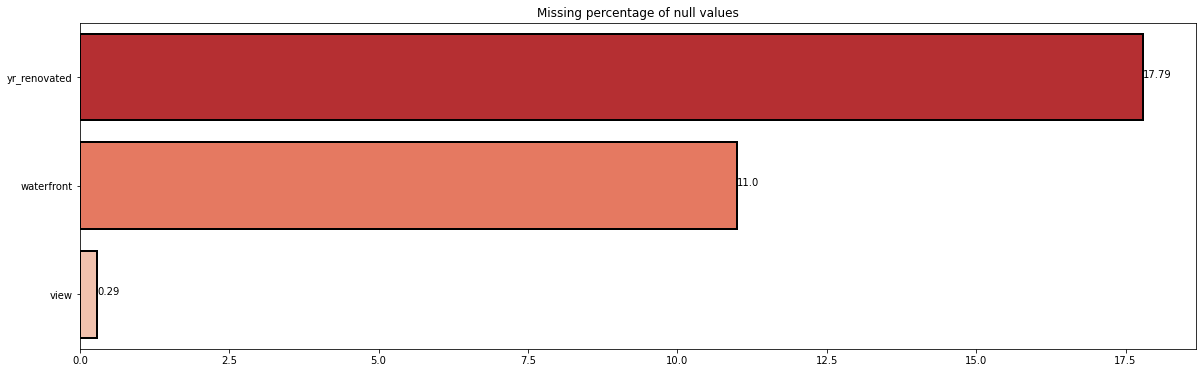

In [7]:
missing_percentage = missing_percentage[missing_percentage != 0] # Only the missing data
plt.rcParams['figure.figsize'] = (20,6)
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette='Reds_r', orient='h', edgecolor='black', linewidth=2)
plt.title("Missing percentage of null values")

# Add annotations
for index, value in enumerate(missing_percentage):
    plt.text(value, index, str(round(value,2)))


plt.show()

### Feature Engineering

#### Date Column
Convert the date column to date time data type

In [8]:
# Convert the "date" column to datetime format
df["date"] = pd.to_datetime(df.date)

# Extract the year, month, day, and day of the week  from the "date" column and create new columns
df["year"] = df.date.dt.year
df["month"] = df.date.dt.month
df["day"] = df.date.dt.day
df["day_of_week"] = df.date.dt.day_name()

# Drop the original "date" column, as we've extracted the relevant date components
df = df.drop("date", axis=1)

In [9]:
df.head()
# This shows that the date column has been dropped

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 221900.00         3       1.00         1180      5650    1.00   
1  6414100192 538000.00         3       2.25         2570      7242    2.00   
2  5631500400 180000.00         2       1.00          770     10000    1.00   
3  2487200875 604000.00         4       3.00         1960      5000    1.00   
4  1954400510 510000.00         3       2.00         1680      8080    1.00   

  waterfront  view  condition          grade  sqft_above sqft_basement  \
0        NaN  NONE    Average      7 Average        1180           0.0   
1         NO  NONE    Average      7 Average        2170         400.0   
2         NO  NONE    Average  6 Low Average         770           0.0   
3         NO  NONE  Very Good      7 Average        1050         910.0   
4         NO  NONE    Average         8 Good        1680           0.0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  \
0      1955          0.00    98178 47.51 -122.26           1340        5650   
1      1951       1991.00    98125 47.72 -122.32           1690        7639   
2      1933           nan    98028 47.74 -122.23           2720        8062   
3      1965          0.00    98136 47.52 -122.39           1360        5000   
4      1987          0.00    98074 47.62 -122.05           1800        7503   

   year  month  day day_of_week  
0  2014     10   13      Monday  
1  2014     12    9     Tuesday  
2  2015      2   25   Wednesday  
3  2014     12    9     Tuesday  
4  2015      2   18   Wednesday

#### Yr_renovated column
After examining this column, the houses with non-null values were considered renovated and those with null values were considered not renovated. A column is_renovated was created to contain binary encoding assigning 1 to renovated and 0 to not renovated houses.

In [10]:
#Replace null values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

#Create 'is_renovated' column and set values based on 'yr_renovated'
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

#### Price_per_sqft column:

In [12]:
df['price_per_sqft'] = df['price']/df['sqft_living']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      19221 non-null  object 
 8   view            21534 non-null  object 
 9   condition       21597 non-null  object 
 10  grade           21597 non-null  object 
 11  sqft_above      21597 non-null  int64  
 12  sqft_basement   21597 non-null  object 
 13  yr_built        21597 non-null  int64  
 14  yr_renovated    21597 non-null  float64
 15  zipcode         21597 non-null  int64  
 16  lat             21597 non-null  float64
 17  long            21597 non-null 

#### Data Inconsistencies

#### View column

In [14]:
# Checking view column for number of null values
df['view'].isna().sum()

63

In [15]:
# Check view column counts of ratings
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

There are 63 null values and the NONE rating has the highest count at 19422. We decided to replace null with NONE as it is the value with the highest count.

In [16]:
#Replace NaN with None
df["view"].fillna(value = 'NONE', inplace = True)

#### Grade Column

In [17]:
#Check count of values in the grade column
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

The column has data type inconsistency where the values have both numerical and categorical values. To remove the inconsistency we chose to maintain the integer values

In [18]:
# Use use the str.extract() to  digits from the mixed' column
df['grade'] = df['grade'].str.extract('(\d+)')

# Convert the "grade" column to numeric (integer)
df['grade'] = pd.to_numeric(df['grade'], errors='coerce')

#### Sqft_basement column
The column datatype os object however a look into the values in the column shows that there are numerical values

In [19]:
# Attempt to convert the column to numeric and catch errors
try:
    df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
except ValueError as e:
    # Print the error message which will contain information about the problematic values
    print("Error:", e)

Error: Unable to parse string "?" at position 6


From the sample we can see that there is a '?' value which is causing the difference in datatype for the column.

In [20]:
#Convert datatype to numeric replacing ? with NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

#Check number of null values in column
df['sqft_basement'].isnull().sum()

454

Following the conversion of ? to null values, the next step is to replace the null values in the column with the mean

In [21]:
# Replace null values with mean value
df['sqft_basement'].fillna(df['sqft_basement'].mean(), inplace=True)

#### Categorical Variables

In [22]:
#Checking for categorical type variables
df.select_dtypes('object').sample(5)

waterfront  view  condition day_of_week
14058         NO  NONE    Average      Friday
11749         NO  NONE       Good    Thursday
160           NO  NONE    Average   Wednesday
1548          NO  NONE    Average      Monday
17133         NO  NONE  Very Good    Thursday

#### waterfront column:

The "waterfront" variable associated with houses appears to be a categorical variable encompassing two distinct values: "NO" and "YES." There are two plausible approaches to handle this variable effectively. 

The first approach involves encoding it as a binary variable, wherein "NO" is denoted as 0, and "YES" is represented by 1. This transformation allows for the utilization of the variable within numerical analyses or predictive models.

Alternatively, the second approach entails retaining the variable in its categorical form. Subsequently, techniques like one-hot encoding can be applied later in the prediction pipeline, preserving the categorical nature of the variable until it is more conducive to convert it into a numerical format. The choice between these methods depends on the specific requirements and objectives of the analysis or modeling process.

#### view column:

An effective approach for managing this variable involves treating it as an ordinal variable, wherein each value signifies a distinct level of view quality. For instance, numerical values can be assigned to each level, such as assigning "NONE" as 0, "AVERAGE" as 1, "GOOD" as 2, "FAIR" as 3, and "EXCELLENT" as 4. This ordinal representation enables the utilization of the variable in various statistical analyses or machine learning models that necessitate numerical input, preserving the inherent ranking of the categories based on view quality.

#### condition column:

The "condition" variable associated with a house seems to be an ordinal categorical variable, encompassing values spanning from 1 (Poor) to 5 (Very Good). The handling of such a variable can vary depending on the specific analytical goals in mind. One possible approach entails treating this variable as a numerical variable, thus utilizing the numerical values directly within the analysis. In this context, we have opted to employ Custom Mapping to encode the categorical variables, aligning with this approach.

#### day_of_week column:

Additionally, an alternative method for handling this variable involves the use of a OneHotEncoder.

In [23]:
df

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 221900.00         3       1.00         1180      5650   
1      6414100192 538000.00         3       2.25         2570      7242   
2      5631500400 180000.00         2       1.00          770     10000   
3      2487200875 604000.00         4       3.00         1960      5000   
4      1954400510 510000.00         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018 360000.00         3       2.50         1530      1131   
21593  6600060120 400000.00         4       2.50         2310      5813   
21594  1523300141 402101.00         2       0.75         1020      1350   
21595   291310100 400000.00         3       2.50         1600      2388   
21596  1523300157 325000.00         2       0.75         1020      1076   

       floors waterfront  view  condition  grade  sqft_above  sqft_basement  \
0        1.00        NaN  NONE    Average      7        1180           0.00   
1        2.00         NO  NONE    Average      7        2170         400.00   
2        1.00         NO  NONE    Average      6         770           0.00   
3        1.00         NO  NONE  Very Good      7        1050         910.00   
4        1.00         NO  NONE    Average      8        1680           0.00   
...       ...        ...   ...        ...    ...         ...            ...   
21592    3.00         NO  NONE    Average      8        1530           0.00   
21593    2.00         NO  NONE    Average      8        2310           0.00   
21594    2.00         NO  NONE    Average      7        1020           0.00   
21595    2.00        NaN  NONE    Average      8        1600           0.00   
21596    2.00         NO  NONE    Average      7        1020           0.00   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0          1955          0.00    98178 47.51 -122.26           1340   
1          1951       1991.00    98125 47.72 -122.32           1690   
2          1933          0.00    98028 47.74 -122.23           2720   
3          1965          0.00    98136 47.52 -122.39           1360   
4          1987          0.00    98074 47.62 -122.05           1800   
...         ...           ...      ...   ...     ...            ...   
21592      2009          0.00    98103 47.70 -122.35           1530   
21593      2014          0.00    98146 47.51 -122.36           1830   
21594      2009          0.00    98144 47.59 -122.30           1020   
21595      2004          0.00    98027 47.53 -122.07           1410   
21596      2008          0.00    98144 47.59 -122.30           1020   

       sqft_lot15  year  month  day day_of_week  is_renovated  price_per_sqft  
0            5650  2014     10   13      Monday             0          188.05  
1            7639  2014     12    9     Tuesday             1          209.34  
2            8062  2015      2   25   Wednesday             0          233.77  
3            5000  2014     12    9     Tuesday             0          308.16  
4            7503  2015      2   18   Wednesday             0          303.57  
...           ...   ...    ...  ...         ...           ...             ...  
21592        1509  2014      5   21   Wednesday             0          235.29  
21593        7200  2015      2   23      Monday             0          173.16  
21594        2007  2014      6   23      Monday             0          394.22  
21595        1287  2015      1   16      Friday             0          250.00  
21596        1357  2014     10   15   Wednesday             0          318.63  

[21597 rows x 26 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      19221 non-null  object 
 8   view            21597 non-null  object 
 9   condition       21597 non-null  object 
 10  grade           21597 non-null  int64  
 11  sqft_above      21597 non-null  int64  
 12  sqft_basement   21597 non-null  float64
 13  yr_built        21597 non-null  int64  
 14  yr_renovated    21597 non-null  float64
 15  zipcode         21597 non-null  int64  
 16  lat             21597 non-null  float64
 17  long            21597 non-null 

All the necessary columns are now either floats or integers. 

In [25]:
import seaborn as sns
import pandas as pd
import ipywidgets as widgets

def create_boxplots(df):
    def plot_boxplot(column):
        # Plotting Boxplots to view any outliers
        plt.style.use("bmh")
        flierprops = dict(marker='o', markersize=7, markeredgecolor='black', markerfacecolor='teal', alpha=0.5)
        sns.boxplot(x=column, data=df, flierprops=flierprops, showmeans=True, linewidth=3.5,palette="Set3_r")
        plt.title(f"Boxplot Distribution of the '{column.title()}' Variable Checking for outliers")
        
    columns = list(df.columns)
    dropdown = widgets.Dropdown(options=columns)
    widgets.interact(plot_boxplot, column=dropdown)

# Example usage
create_boxplots(df)

interactive(children=(Dropdown(description='column', options=('id', 'price', 'bedrooms', 'bathrooms', 'sqft_li…

#### Checking for Duplicate Records

In [26]:
# Cheking fior duplicates
df.duplicated().any()

False

#### Checking for Records with Outliers

In [27]:
# Getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(5)

(5932, 26)


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1512   7787110060  432900.00         3       2.50         2210      9226   
10701  7214711260  655000.00         4       2.50         3340     34238   
19870  7853280550  700000.00         4       3.50         4490      5099   
15165  2413910190  500000.00         3       1.75         1690     48096   
20881  3860900035 1940000.00         5       3.50         4230     16526   

       floors waterfront  view condition  grade  sqft_above  sqft_basement  \
1512     2.00         NO  NONE   Average      8        2210           0.00   
10701    1.00         NO  NONE      Good      8        2060        1280.00   
19870    2.00         NO  NONE   Average      9        3390        1100.00   
15165    1.00         NO  NONE   Average      7        1690           0.00   
20881    2.00         NO  NONE   Average     10        4230           0.00   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
1512       1998          0.00    98045 47.48 -121.78           2430   
10701      1977          0.00    98077 47.77 -122.08           2400   
19870      2006          0.00    98065 47.54 -121.86           4290   
15165      1973          0.00    98053 47.67 -122.06           2070   
20881      2008          0.00    98004 47.59 -122.20           3000   

       sqft_lot15  year  month  day day_of_week  is_renovated  price_per_sqft  
1512         8902  2014     10   13      Monday             0          195.88  
10701       36590  2014     10    1   Wednesday             0          196.11  
19870        5537  2014      5   28   Wednesday             0          155.90  
15165       35160  2015      2    2      Monday             0          295.86  
20881       12362  2015      4   15   Wednesday             0          458.63

In [28]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

27.47

Approximately 27.27% of the records in our dataset exhibit outliers. Given that this proportion does not exceed 50% of our dataset, we may consider discarding these records with confidence. However, as a precautionary measure, we will retain them temporarily to assess whether their presence has any adverse effects on our model's performance.

## <font color='goldenrod'> Exploratory Data Analysis(EDA)

### Statistics of the data set

In [29]:
df.describe()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21597.00   21597.00  21597.00   21597.00     21597.00   21597.00   
mean  4580474287.77  540296.57      3.37       2.12      2080.32   15099.41   
std   2876735715.75  367368.14      0.93       0.77       918.11   41412.64   
min      1000102.00   78000.00      1.00       0.50       370.00     520.00   
25%   2123049175.00  322000.00      3.00       1.75      1430.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900490.00  645000.00      4.00       2.50      2550.00   10685.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors    grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
count 21597.00 21597.00    21597.00       21597.00  21597.00      21597.00   
mean      1.49     7.66     1788.60         291.85   1971.00         68.76   
std       0.54     1.17      827.76         437.82     29.38        364.04   
min       1.00     3.00      370.00           0.00   1900.00          0.00   
25%       1.00     7.00     1190.00           0.00   1951.00          0.00   
50%       1.50     7.00     1560.00           0.00   1975.00          0.00   
75%       2.00     8.00     2210.00         550.00   1997.00          0.00   
max       3.50    13.00     9410.00        4820.00   2015.00       2015.00   

       zipcode      lat     long  sqft_living15  sqft_lot15     year    month  \
count 21597.00 21597.00 21597.00       21597.00    21597.00 21597.00 21597.00   
mean  98077.95    47.56  -122.21        1986.62    12758.28  2014.32     6.57   
std      53.51     0.14     0.14         685.23    27274.44     0.47     3.12   
min   98001.00    47.16  -122.52         399.00      651.00  2014.00     1.00   
25%   98033.00    47.47  -122.33        1490.00     5100.00  2014.00     4.00   
50%   98065.00    47.57  -122.23        1840.00     7620.00  2014.00     6.00   
75%   98118.00    47.68  -122.12        2360.00    10083.00  2015.00     9.00   
max   98199.00    47.78  -121.31        6210.00   871200.00  2015.00    12.00   

           day  is_renovated  price_per_sqft  
count 21597.00      21597.00        21597.00  
mean     15.69          0.03          264.14  
std       8.63          0.18          110.00  
min       1.00          0.00           87.59  
25%       8.00          0.00          182.29  
50%      16.00          0.00          244.64  
75%      23.00          0.00          318.33  
max      31.00          1.00          810.14

Insights:

1. There are a total of 21,597 observations in the dataset.

2. The mean housing price falls within a broad range, from $78,000 to $7,700,000, indicating significant price variability in the dataset.

3. On average, houses in the dataset tend to have 3-4 bedrooms and 2-2.5 bathrooms.

4. The average living area square footage is around 2,000 sq ft, while the average lot size is approximately 13,000 sq ft. However, it's important to note that there is substantial variability in these measurements, as evidenced by the large standard deviations.

5. Most of the houses in the dataset typically have 1-2 floors and were constructed between 1951 and 1975, with renovations occurring on average around the late 1960s.

6. Geographically, the dataset predominantly represents properties in the Seattle metropolitan area, particularly in zip codes starting with 980XX. These properties are clustered around a latitude of approximately 47.6 and a longitude of around -122.2.

7. The dataset covers housing sales that took place during the years 2014 and 2015, with a concentration of sales occurring during the summer months, specifically between June and September.

In summary, the dataset appears to provide housing data for the Seattle metropolitan area, showcasing a diverse range of properties in terms of size, price, and age. With its substantial sample size and diverse attributes, this dataset holds promise for conducting intriguing analyses and modeling exercises.

#### Distribution of the target variable

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_seaborn(df, variable):
    # Create the histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(df[variable], bins=70, kde=True, color='blue', alpha=0.75)

    # Calculate skewness of histogram
    skewness = df[variable].skew()

    # Calculate mean and median
    mean = df[variable].mean()
    median = df[variable].median()

    # Add vertical lines for mean and median
    plt.axvline(x=mean, color='red', linestyle='--', linewidth=3, label=f'Mean: {mean:.2f}')
    plt.axvline(x=median, color='green', linestyle='--', linewidth=3, label=f'Median: {median:.2f}')

    # Set plot labels and title
    plt.xlabel(variable.title())
    plt.ylabel('Frequency')
    plt.title(f'The "{variable.title()}" Histogram Visualization\n'
              f'(Skewness: {skewness:.2f})', fontsize=16)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

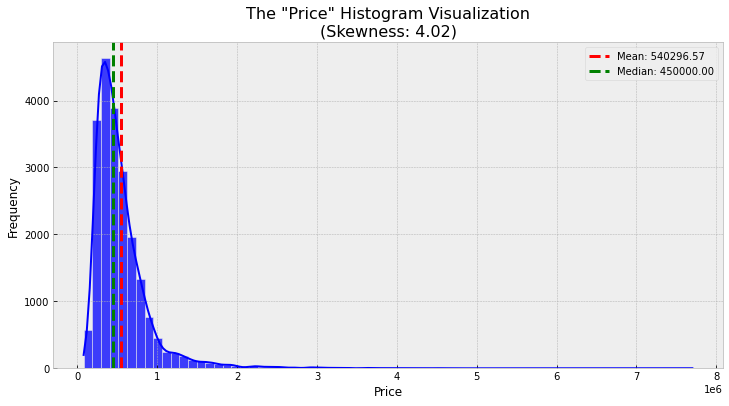

In [31]:
plot_histogram_seaborn(df, 'price')

#### Distribution of the other key numerical features

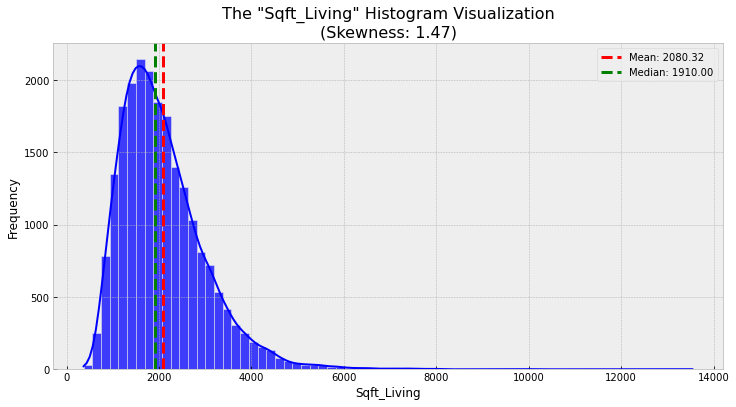

In [32]:
plot_histogram_seaborn(df, 'sqft_living')

Insights:

The distributions of the other numerical features are also right-skewed, with a long tail. This indicates that there are many outliers in the higher end of the range.

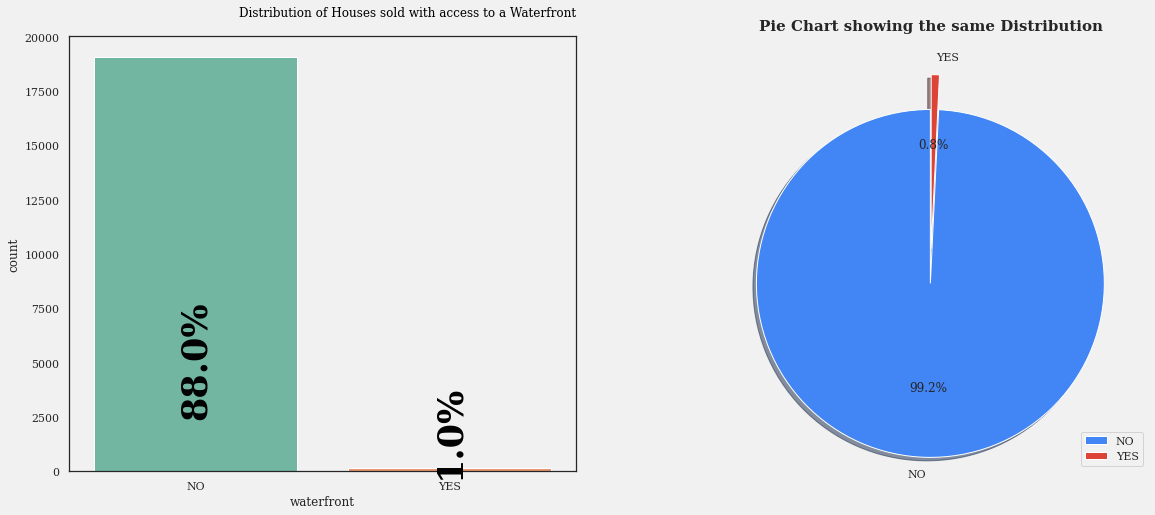

In [33]:
plt.style.background = 'white'

colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='waterfront', data=df, palette='Set2')

for i in ax.patches:
  ax.text(x = i.get_x()+i.get_width()/2, y = i.get_height()/7, s = f"{np.round(i.get_height()/len(df)*100.0)}%", ha = 'center', size = 35, weight = 'bold', rotation = 90, color = 'black')
plt.title('Distribution of Houses sold with access to a Waterfront', fontsize = 15, weight = 'bold', font = 'Serif', color = 'black', loc = 'right', pad = 20)


plt.subplot(1, 2, 2)
sizes = df['waterfront'].value_counts()
colors = ['#4285F4', '#DB4437']
labels = ['NO', 'YES']
explode = [0.17, 0.03]


plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%1.1f%%', startangle=90)
plt.title('Pie Chart showing the same Distribution', fontsize = 15, weight = 'bold')

# Adding a legend and specifying its location
plt.legend(loc='lower right')


plt.show()

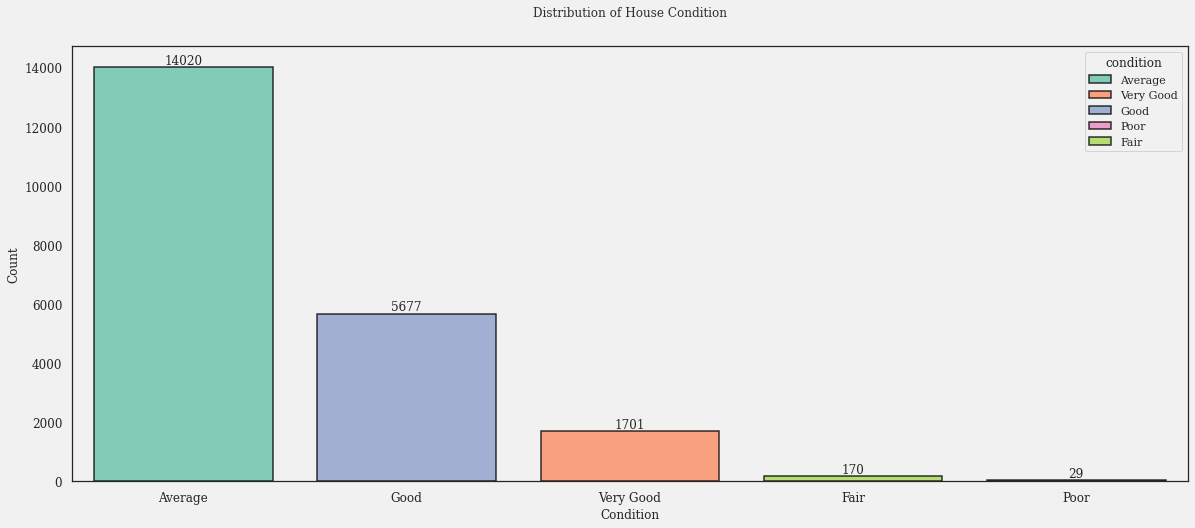

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(x='condition', data=df, palette='Set2', edgecolor='black', linewidth=1.5, saturation=1, alpha=0.8, zorder=3, hue='condition', order=df['condition'].value_counts().index, dodge=False)
plt.title('Distribution of House Condition', fontsize=18, fontweight='bold', font='Serif', color='black', loc='center', pad=30, alpha=0.8)
plt.xlabel('Condition', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# Add names as annotations
for index, value in enumerate(df['condition'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold', font='Serif', fontsize=12)
    
# add names as annotations to the plot

plt.show()

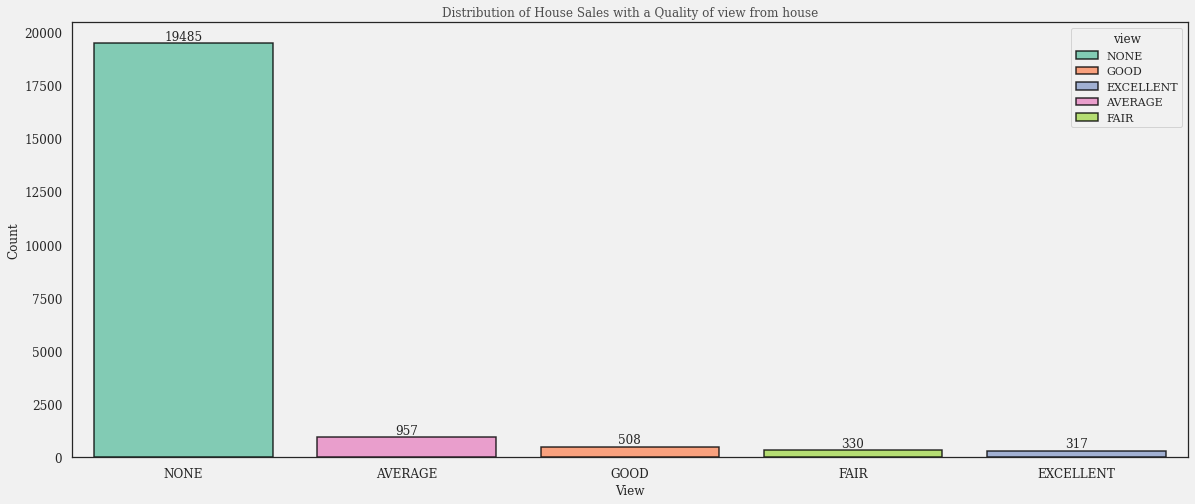

In [35]:
plt.figure(figsize=(20, 8))
sns.countplot(x='view', data=df, palette='Set2', edgecolor='black', linewidth=1.5, saturation=1, alpha=0.8, zorder=3, hue='view', order=df['view'].value_counts().index, dodge=False)
plt.title('Distribution of House Sales with a Quality of view from house', fontsize=18, fontweight='bold', font='Serif',alpha=0.8)
plt.xlabel('View', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# Add names as annotations
for index, value in enumerate(df['view'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold', font='Serif', fontsize=12)

plt.show()

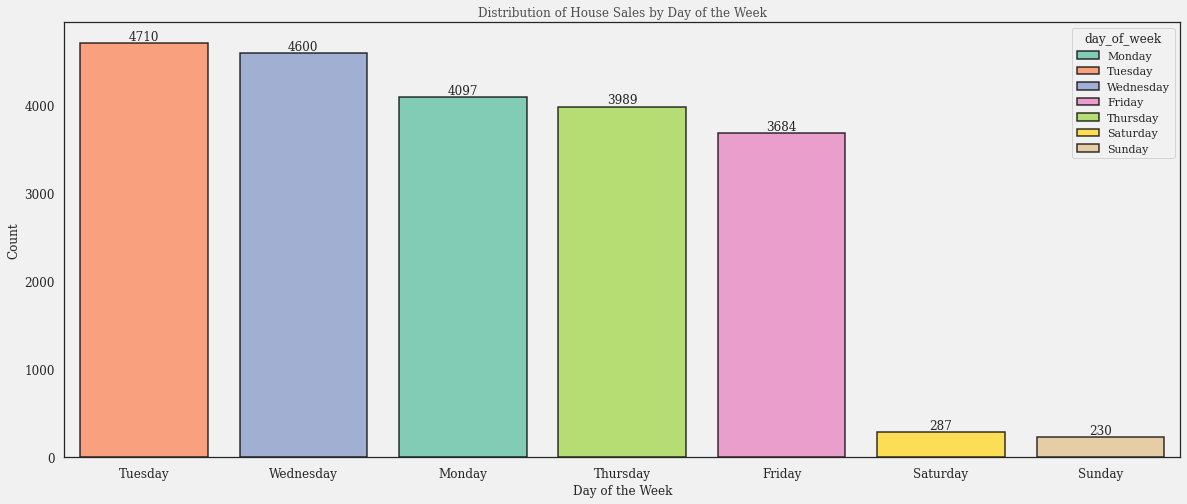

In [36]:
plt.figure(figsize=(20, 8))
sns.countplot(x='day_of_week', data=df, palette='Set2', edgecolor='black', linewidth=1.5, saturation=1, alpha=0.8, zorder=3, hue='day_of_week', order=df['day_of_week'].value_counts().index, dodge=False)
plt.title('Distribution of House Sales by Day of the Week', fontsize=18, fontweight='bold', font='Serif',alpha=0.8)
plt.xlabel('Day of the Week', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# Add names as annotations
for index, value in enumerate(df['day_of_week'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold', font='Serif', fontsize=12)

plt.show()

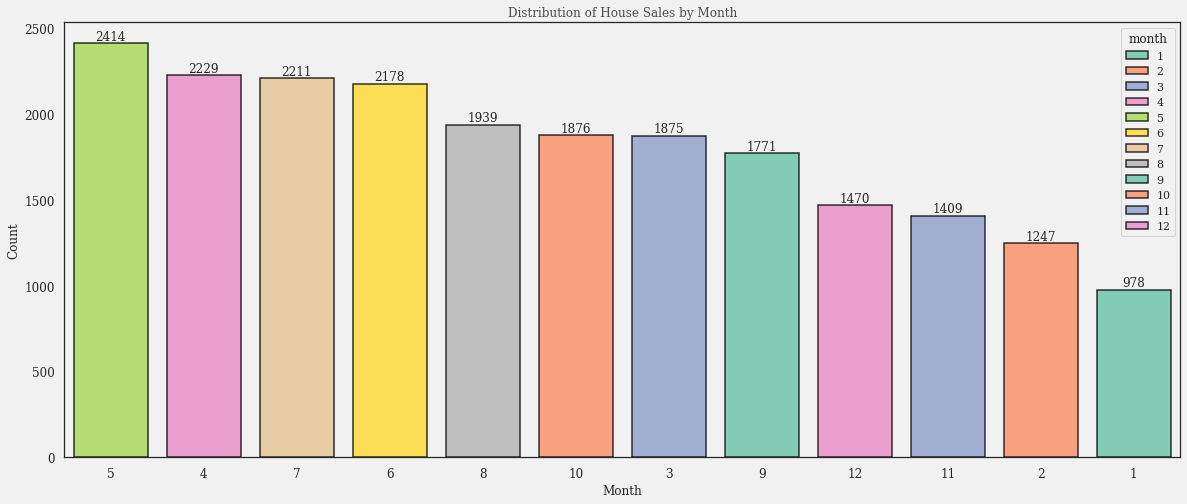

In [37]:
# a count of the number of houses sold per month
plt.figure(figsize=(20, 8))
sns.countplot(x='month', data=df, palette='Set2', edgecolor='black', linewidth=1.5, saturation=1, alpha=0.8, zorder=3, hue='month', order=df['month'].value_counts().index, dodge=False)
plt.title('Distribution of House Sales by Month', fontsize=18, fontweight='bold', font='Serif',alpha=0.8)
plt.xlabel('Month', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# Add names as annotations
for index, value in enumerate(df['month'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold', font='Serif', fontsize=12)

plt.show()

In [38]:
df['is_renovated'].value_counts() / len(df) * 100 * 100 / 100 # 100 / 100 to get 2 decimal places

0   96.56
1    3.44
Name: is_renovated, dtype: float64

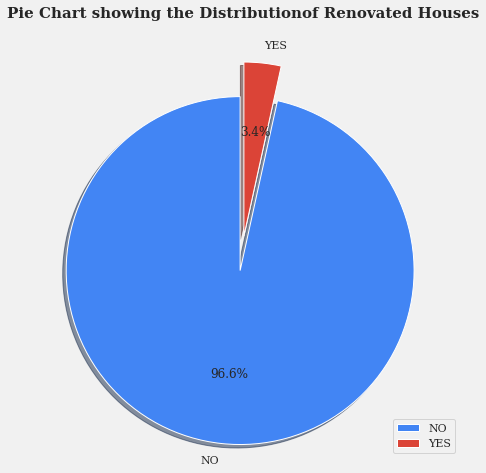

In [39]:
plt.figure(figsize=(20, 8))
# pie chart for the distribution of is_renovated
sizes = df['is_renovated'].value_counts()
colors = ['#4285F4', '#DB4437']
labels = ['NO', 'YES']
explode = [0.17, 0.03]


plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors=colors ,explode = explode, shadow = True, autopct = '%1.1f%%', startangle=90)
plt.title('Pie Chart showing the Distributionof Renovated Houses', fontsize = 15, weight = 'bold')

# Adding a legend and specifying its location
plt.legend(loc='lower right')


plt.show()

#### Distribution of the target variable by numeric features

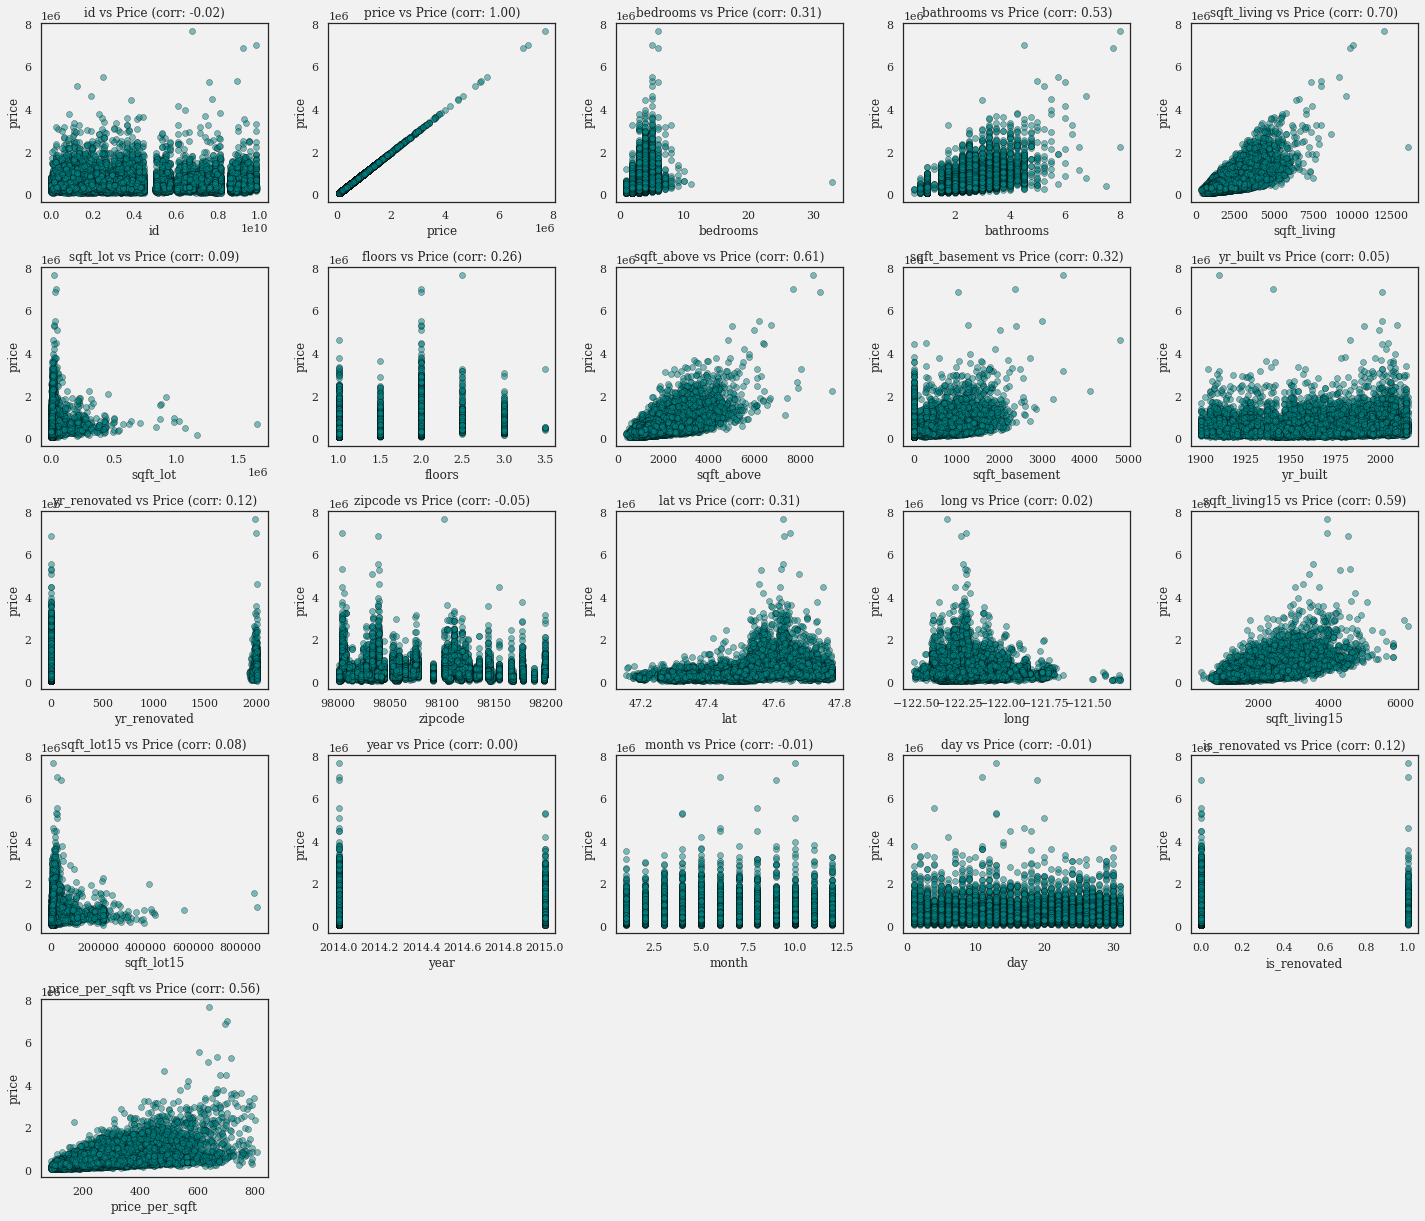

In [40]:
# Get list of columns to plot against target
cols = df.columns.tolist()

# Reomve the string columns
cols.remove('view')
cols.remove('waterfront')
cols.remove('day_of_week')
cols.remove('grade')
cols.remove('condition')

# Filter the columns that are currently in the dataframe
cols = [col for col in cols if col in df.columns]

# Create subplots
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
axs = axs.flatten()

# Loop through each column and plot against target
for i, col in enumerate(cols):
    # Calculate correlation between feature and target
    corr = df['price'].corr(df[col])
    
    # Scatter plot with regression line
    sns.scatterplot(x=col, y='price', data=df, ax=axs[i], alpha=0.5, marker='o', edgecolor='k', color='teal', linewidth=0.5, zorder=3,)
    plt.gca().set_facecolor('#e6e6e6')
    
    # Add title with correlation coefficient
    title = f"{col} vs Price (corr: {corr:.2f})"
    axs[i].set_title(title)

# Remove unused subplots
for i in range(len(cols), len(axs)):
    fig.delaxes(axs[i])

# Show plot
plt.tight_layout()
plt.show()

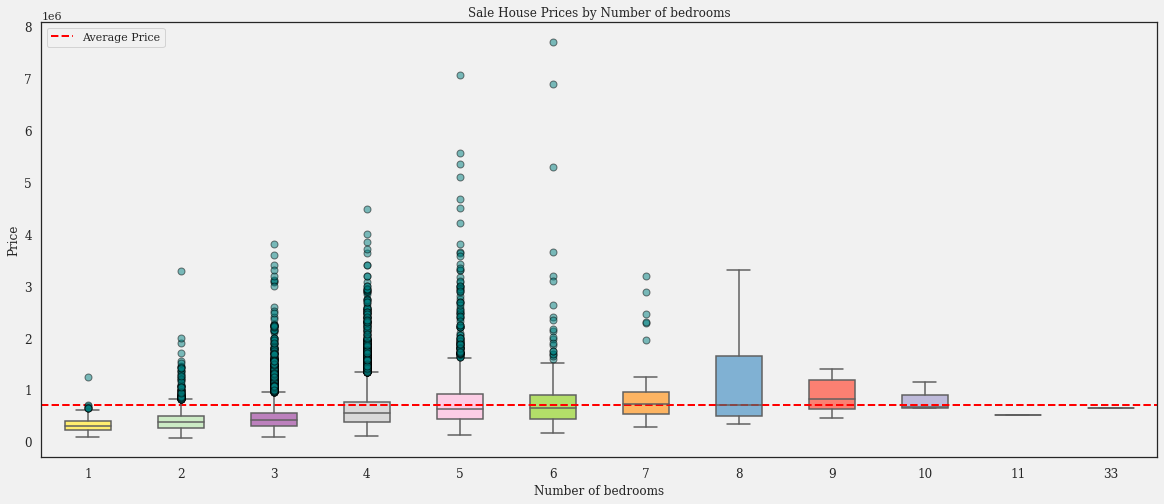

In [41]:
# use the average price and shw it in the box plot
plt.figure(figsize=(20, 8))

# use a group by statement to calculate the average price per number of bedrooms
avg_price_per_bedroom = df.groupby('bedrooms')['price'].mean().reset_index()

# plot the average price per number of bedrooms in a box plot
sns.boxplot(x='bedrooms', y='price', data=df, palette='Set3_r', linewidth=1.5, width=0.5, zorder=3, saturation=1, flierprops=dict(marker='o', markersize=7, markeredgecolor='black', markerfacecolor='teal', alpha=0.5))



# set the title of the plot
plt.title('Sale House Prices by Number of bedrooms', fontsize=18, fontweight='bold', font='Serif')

# set the x and y labels
plt.xlabel('Number of bedrooms', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Price', fontsize=15, fontweight='bold', font='Serif')

# set the x and y ticks
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# set the x and y limits
# plt.xlim(0, 11)
# plt.ylim(0, 1000000)

# add the average price per number of bedrooms as a horizontal line
plt.axhline(y=avg_price_per_bedroom['price'].mean(), color='red', linestyle='--', linewidth=2, label='Average Price')

# add a legend
plt.legend(loc='upper left')

# show the plot
plt.show()

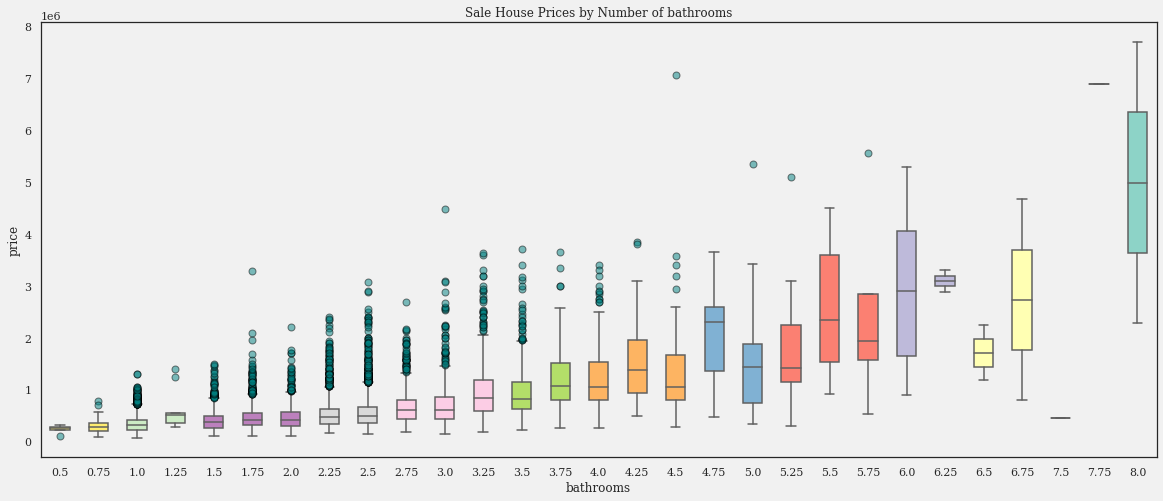

In [42]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='bathrooms', y='price', data=df, palette='Set3_r', linewidth=1.5, width=0.5, zorder=3, saturation=1, flierprops=dict(marker='o', markersize=7, markeredgecolor='black', markerfacecolor='teal', alpha=0.5))
plt.title('Sale House Prices by Number of bathrooms', fontsize=18, fontweight='bold', font='Serif')
plt.show()

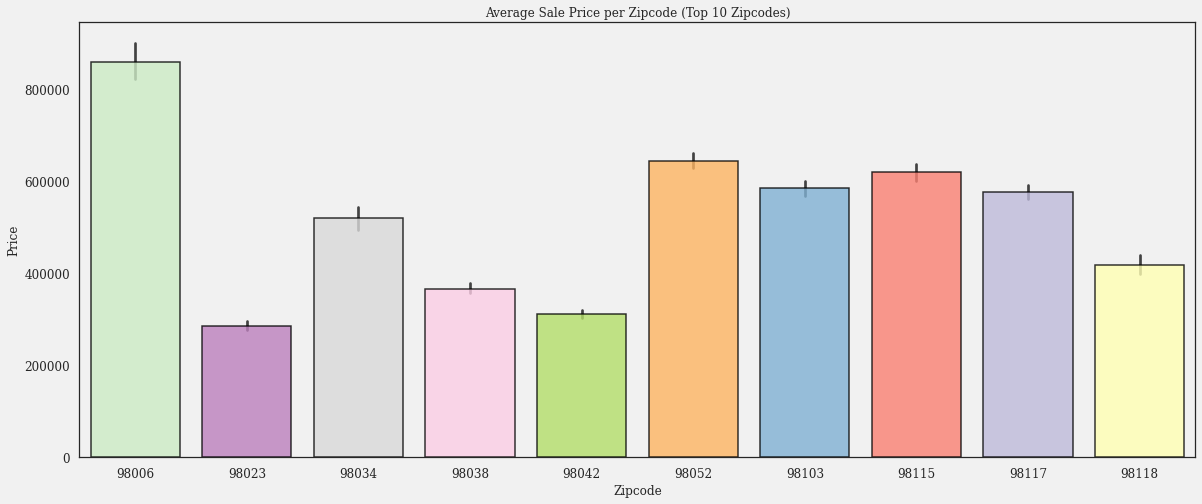

In [43]:
top_10_zipcodes = df['zipcode'].value_counts().sort_values(ascending=False).head(10).index
plt.figure(figsize=(20, 8))
sns.barplot(x='zipcode', y='price', data=df[df['zipcode'].isin(top_10_zipcodes)], palette='Set3_r', linewidth=1.5, zorder=3, saturation=1, edgecolor='black', alpha=0.8, estimator=np.mean)
plt.title('Average Sale Price per Zipcode (Top 10 Zipcodes)', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Zipcode', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Price', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')
plt.show()

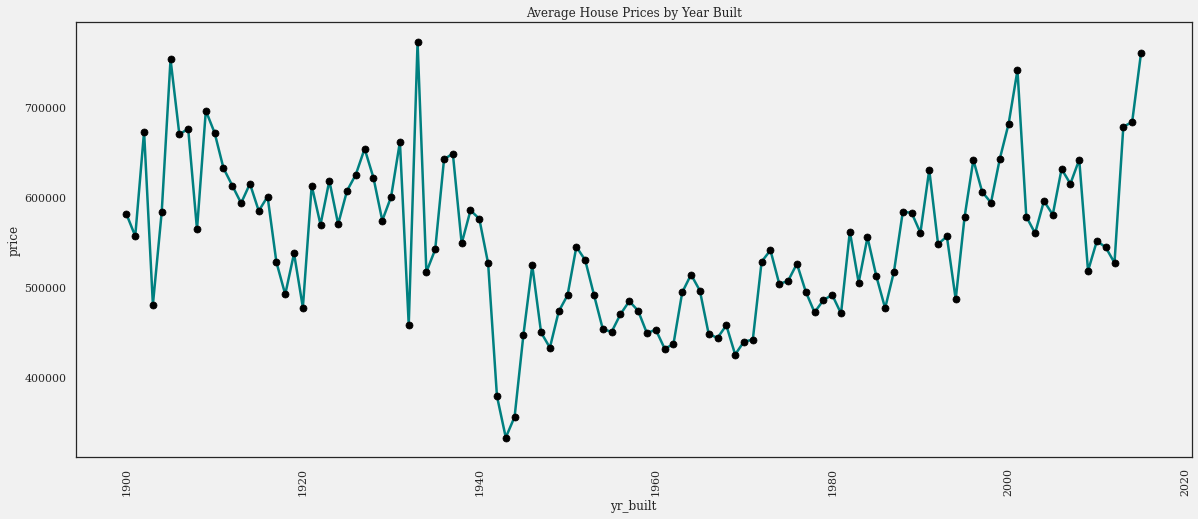

In [44]:
# average price per yr_built
plt.figure(figsize=(20, 8))
sns.lineplot(x='yr_built', y='price', data=df, estimator = np.mean, ci=None, color='teal', linewidth=2.5, marker='o', markerfacecolor='black', markersize=7, markeredgecolor='black')
plt.xticks(rotation=90)
plt.title('Average House Prices by Year Built', fontsize=18, fontweight='bold', font='Serif')
plt.show()

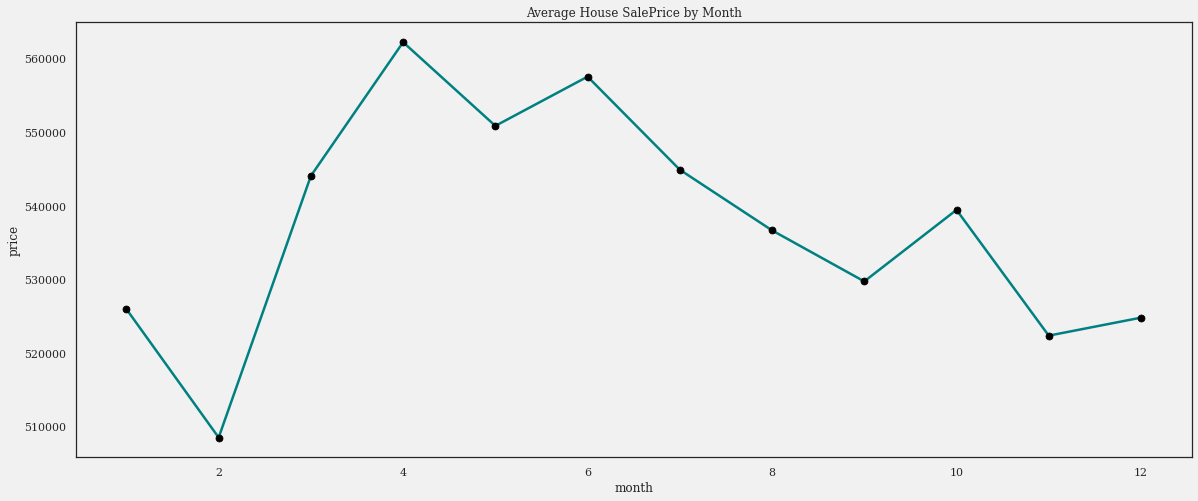

In [45]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='month', y='price', data=df, ci=None, color='teal', linewidth=2.5, marker='o', markerfacecolor='black', markersize=7, markeredgecolor='black', estimator=np.mean)
plt.title('Average House SalePrice by Month', fontsize=18, fontweight='bold', font='Serif')
plt.show()

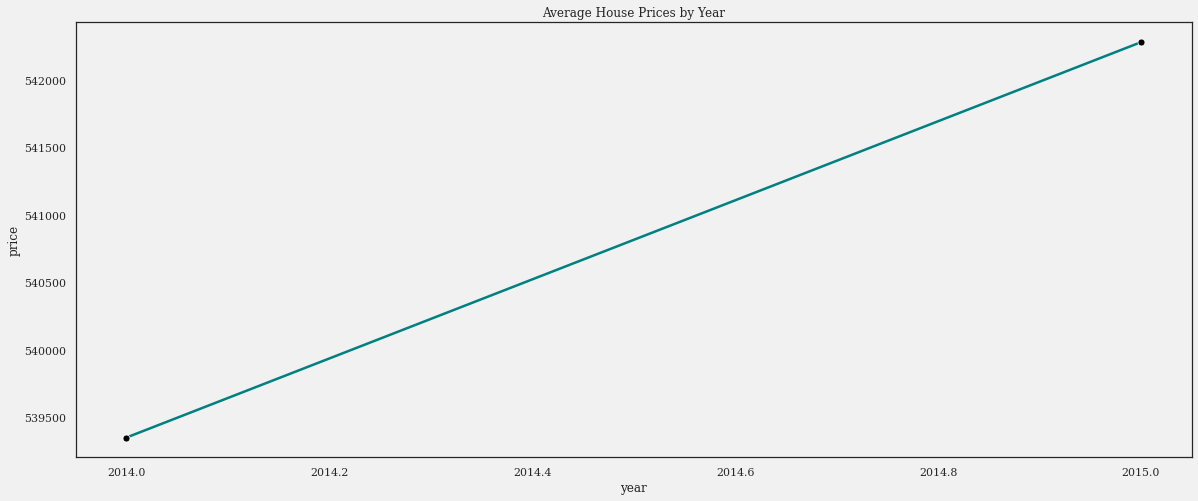

In [46]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='year', y='price', data=df, ci=None, color='teal', linewidth=2.5, marker='o', markerfacecolor='black', markersize=7, estimator=np.mean)
plt.title('Average House Prices by Year', fontsize=18, fontweight='bold', font='Serif')
plt.show()

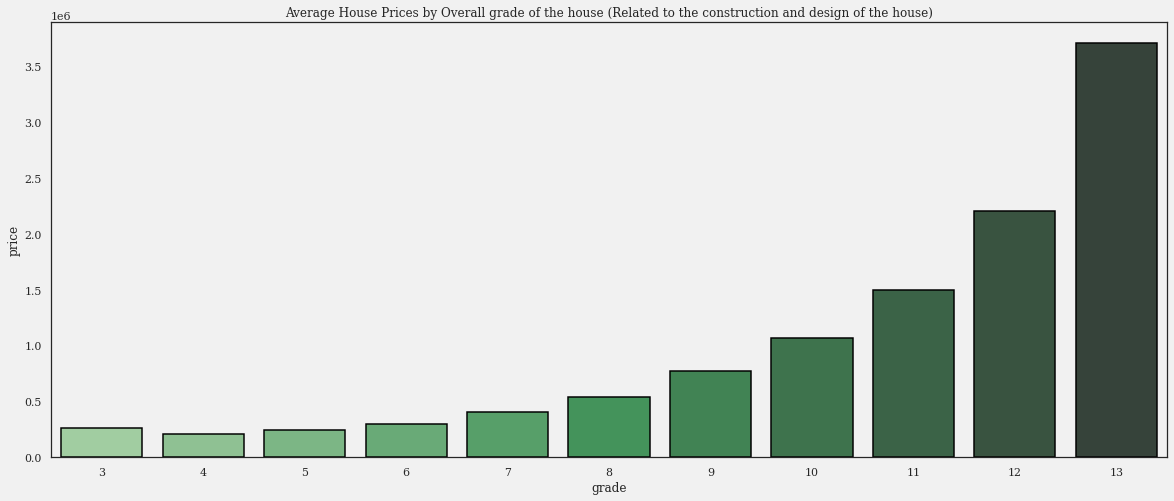

In [47]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='grade', y='price', data=df, estimator=np.mean, ci=None, palette='Greens_d', linewidth=1.5, edgecolor='black', capsize=0.1, errcolor='black', errwidth=1.5, saturation=0.75)
plt.title('Average House Prices by Overall grade of the house (Related to the construction and design of the house)', fontsize=18, fontweight='bold', font='Serif')
plt.show()

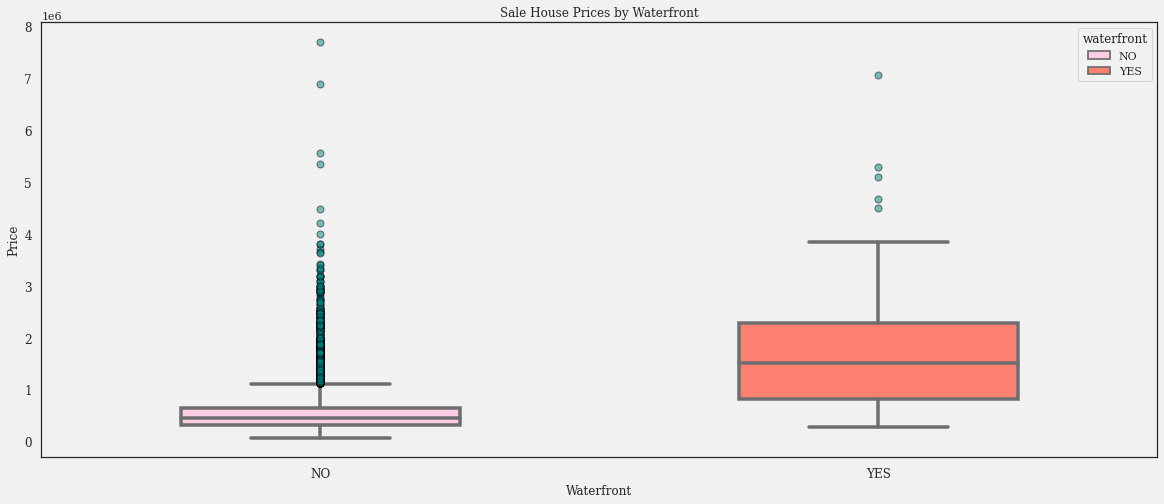

In [48]:
# avrega price per waterfront using a boxplot with a hue of waterfront
plt.figure(figsize=(20, 8))
sns.boxplot(x='waterfront', y='price', data=df, palette='Set3_r', linewidth=3.5, width=0.5, zorder=3, saturation=1, flierprops=dict(marker='o', markersize=7, markeredgecolor='black', markerfacecolor='teal', alpha=0.5), hue='waterfront', dodge=False)
plt.title('Sale House Prices by Waterfront', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Waterfront', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Price', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')
plt.show()

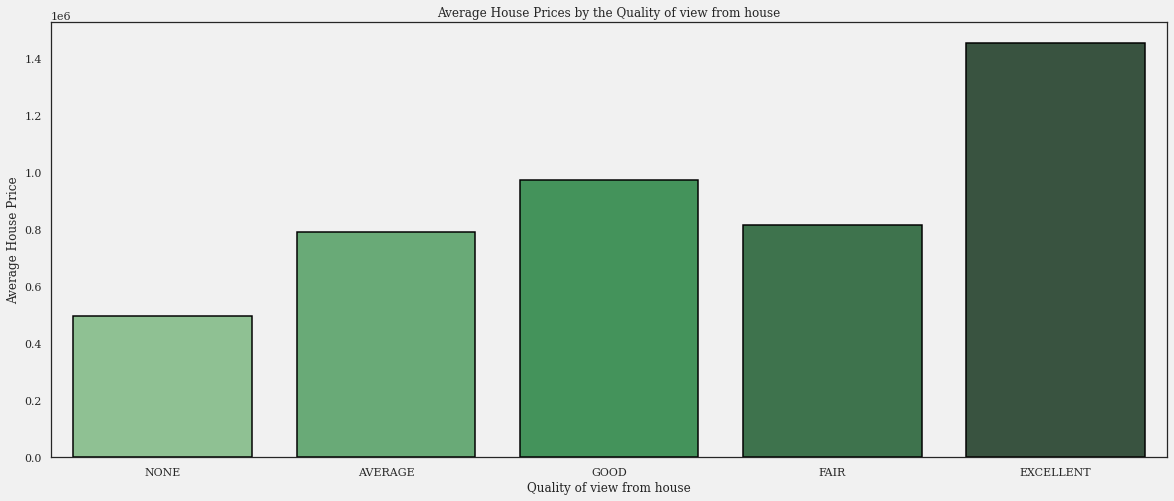

In [49]:
plt.figure(figsize=(20, 8))
sns.barplot(x='view', y='price', data=df, estimator=np.mean, ci=None, palette='Greens_d', linewidth=1.5, edgecolor='black', capsize=0.1, errcolor='black', errwidth=1.5, saturation=0.75, order=df['view'].value_counts().index)
plt.title('Average House Prices by the Quality of view from house', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Quality of view from house')
plt.ylabel('Average House Price')
plt.show()

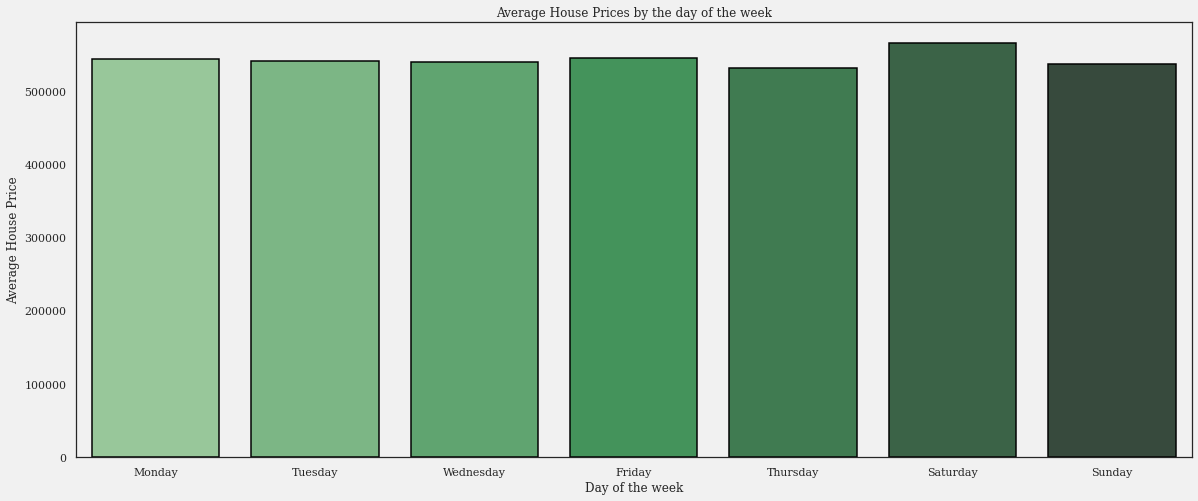

In [50]:
# Which day of the week is the best to sell a house?
plt.figure(figsize=(20, 8))
sns.barplot(x='day_of_week', y='price', data=df, estimator=np.mean, ci=None, palette='Greens_d', linewidth=1.5, edgecolor='black', capsize=0.1, errcolor='black', errwidth=1.5, saturation=0.75)
plt.title('Average House Prices by the day of the week', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Day of the week')
plt.ylabel('Average House Price')
plt.show()

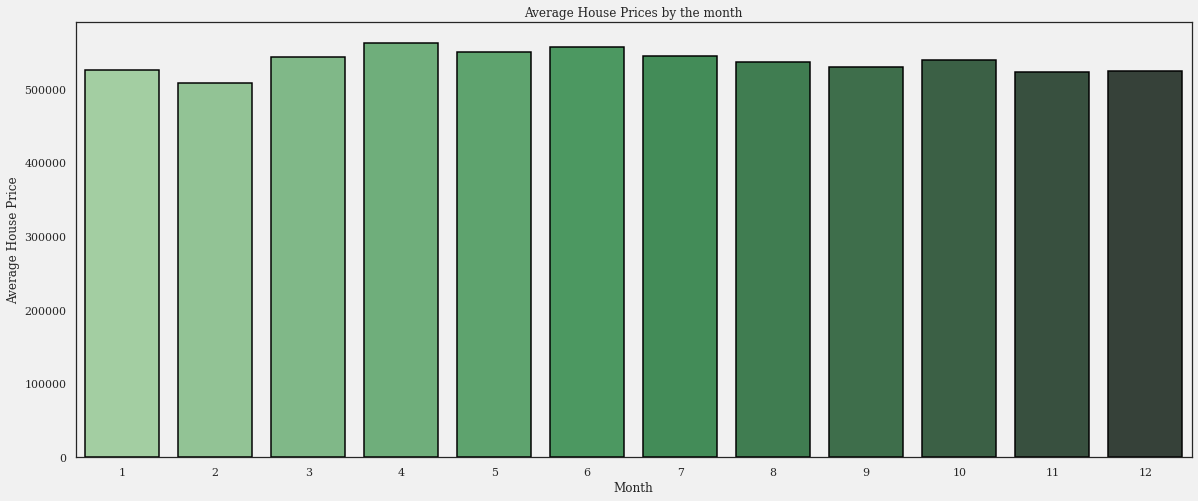

In [51]:
# Which month is the best to sell a house?
plt.figure(figsize=(20, 8))
sns.barplot(x='month', y='price', data=df, estimator=np.mean, ci=None, palette='Greens_d', linewidth=1.5, edgecolor='black', capsize=0.1, errcolor='black', errwidth=1.5, saturation=0.75)
plt.title('Average House Prices by the month', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Month')
plt.ylabel('Average House Price')
plt.show()

In [52]:
# Create a map scatterbox that shows the location of the houses in df
fig = px.scatter_mapbox(
    df, lat="lat", 
    lon="long", 
    color="price", 
    size="price", 
    color_continuous_scale=px.colors.cyclical.IceFire, 
    size_max=15, 
    zoom=10
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

### Multivariate Analysis

Checking for Correlation among the variables

In [53]:
# correlations
df_corr = df.corr()
df_corr["price"].sort_values(ascending=False)

price             1.00
sqft_living       0.70
grade             0.67
sqft_above        0.61
sqft_living15     0.59
price_per_sqft    0.56
bathrooms         0.53
sqft_basement     0.32
bedrooms          0.31
lat               0.31
floors            0.26
yr_renovated      0.12
is_renovated      0.12
sqft_lot          0.09
sqft_lot15        0.08
yr_built          0.05
long              0.02
year              0.00
month            -0.01
day              -0.01
id               -0.02
zipcode          -0.05
Name: price, dtype: float64

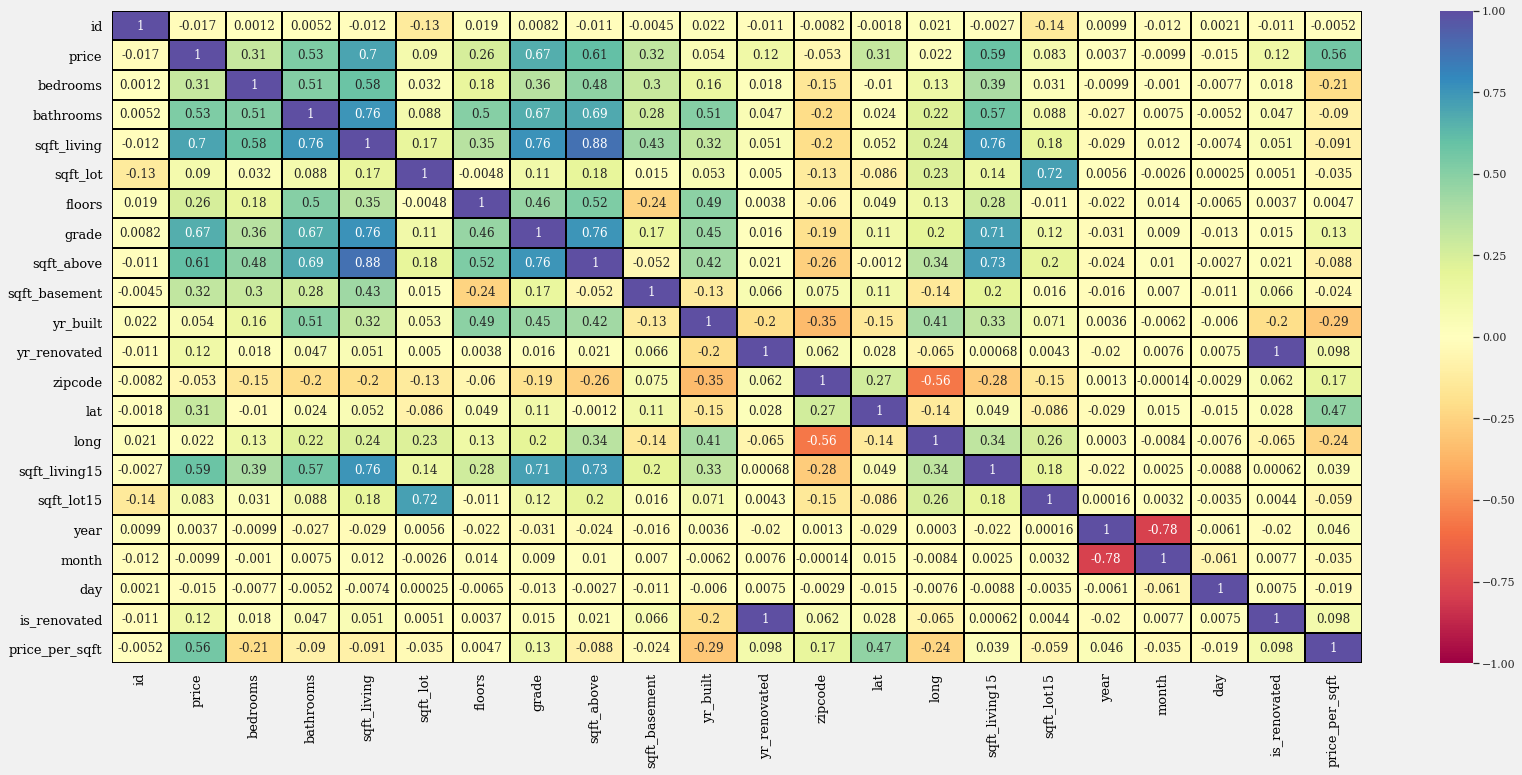

In [54]:
plt.figure(figsize = (28,12))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot=True, linewidths= 1, linecolor='black', cmap = "Spectral")
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)
plt.show()

Checking for Multicolinerarity using Variance Inflation Factor

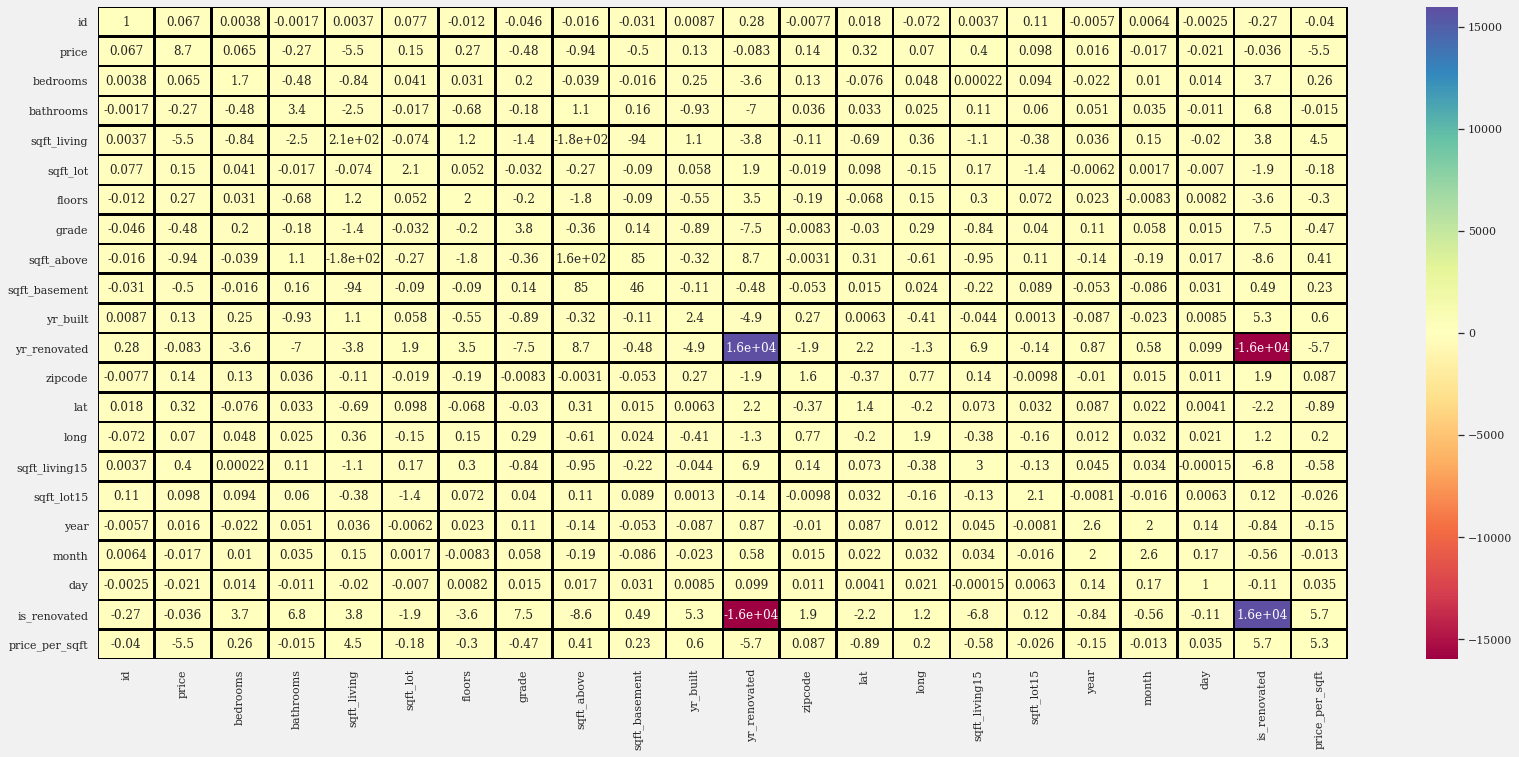

In [55]:
vif = pd.DataFrame(np.linalg.inv(df_corr.values), index = df_corr.index, columns=df_corr.columns)

# plt.style.use("ggplot")
plt.figure(figsize = (28,12))
sns.heatmap(vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black')

plt.show()

Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal.

Insights:

sqft_basement has a VIF score of 46. This is a very high score and indicates that this variable is highly correlated with other variables in the dataset. This is not surprising since the sqft_basement is a subset of the sqft_living variable. We will drop this variable from the dataset.

is_renovated has a VIF score of 16000. This is a very high score and indicates that this variable is highly correlated with other variables in the dataset. This is not surprising since the is_renovated is a subset of the yr_renovated variable. We will drop this variable from the dataset.

yr_renovated also has a VIF score of 16000. This is a very high score and indicates that this variable is highly correlated with other variables in the dataset. We will drop this variable from the dataset.

price_per_sqft has a VIF score of 5.3. This is a high score and indicates that this variable is highly correlated with other variables in the dataset. We will drop this variable from the dataset.

#### Test for Multicolinerarity

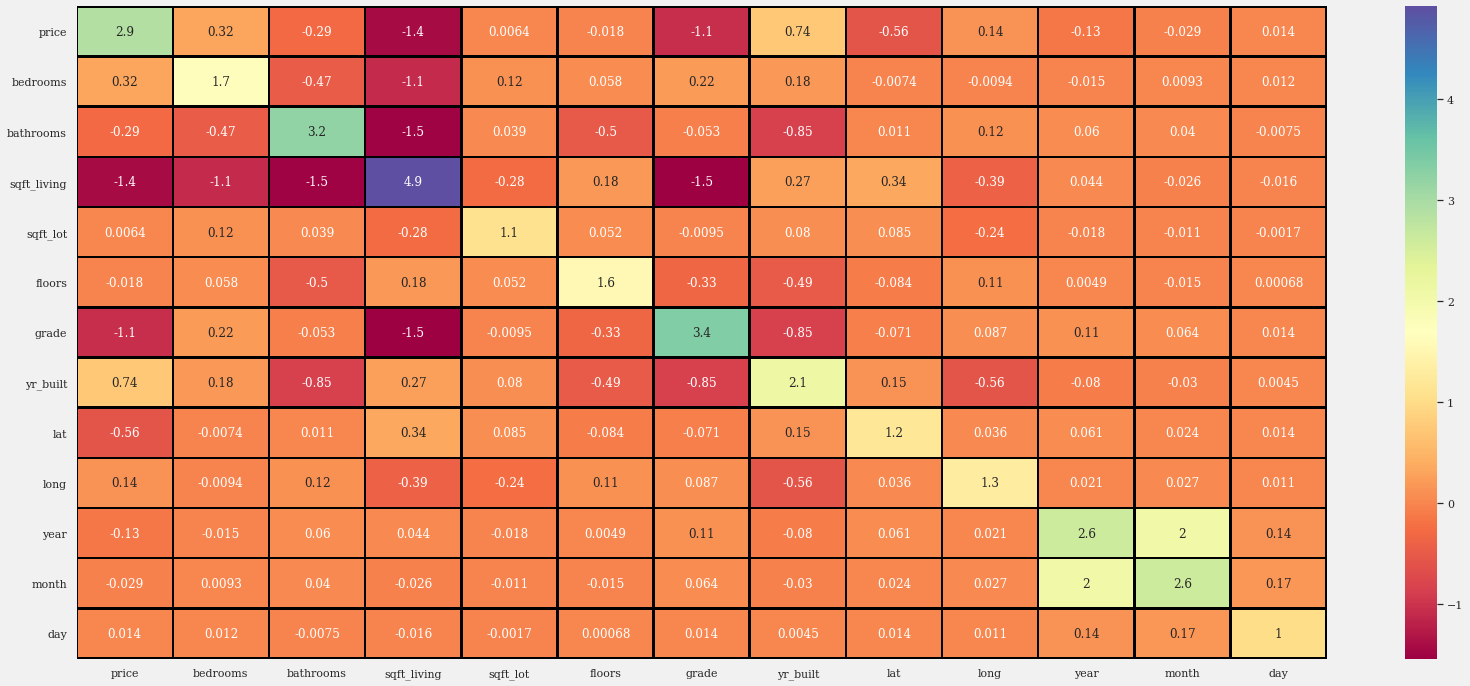

In [56]:
df.drop(columns=['id', 'zipcode','sqft_basement', 'is_renovated', 'yr_renovated', 'price_per_sqft', 'sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True)


# # get the VIF score
new_corr = df.corr()
new_vif = pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns = new_corr.columns)

# # plot the VIF score
plt.figure(figsize = (28,12))
sns.heatmap(new_vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black')

plt.show()

#### Encoding the Categorical Variables

In [57]:
# Define the mapping of categories to numerical values
mapping = {'NONE':0, 'AVERAGE':1, 'GOOD':2, 'FAIR':3, 'EXCELLENT':4}

# Apply the mapping to the "view" column
df['view'] = df['view'].map(mapping)

In [58]:
# Define the mapping of categories to numerical values
condition_mapping = {'Poor': 1,'Fair': 2,'Average': 3,'Good': 4,'Very Good': 5}

# Apply mapping to column
df['condition'] = df['condition'].map(condition_mapping)

In [59]:
# Define the mapping of categories to numerical values
mapping = {'NO':0, 'YES':1}

# Apply the mapping to the "view" column
df['waterfront'] = df['waterfront'].map(mapping)

In [60]:
# Define the mapping of categories to numerical values
condition_mapping = {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Apply mapping to column
df['day_of_week'] = df['day_of_week'].map(condition_mapping)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   view         21597 non-null  int64  
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
 13  year         21597 non-null  int64  
 14  month        21597 non-null  int64  
 15  day          21597 non-null  int64  
 16  day_of_week  21597 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 2.8 MB


## <font color='goldenrod'> Modelling

Create a Baseline model

In [62]:
from statsmodels.formula.api import ols
simple_formula = "price ~ sqft_living"
simple_model = ols(formula=simple_formula, data=df).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:13:55   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpreting the Model Metrices:

1. **Dependent Variable - Price**: This indicates that the variable being predicted or modeled is the "price" of houses.

2. **R-squared**: The R-squared value is 0.493, which represents the coefficient of determination. It indicates that approximately 49.3% of the variance in the dependent variable "price" is explained by the independent variable "sqft_living." In other words, this model accounts for 49.3% of the variability in house prices based on living area square footage.

3. **Adjusted R-squared**: The adjusted R-squared is also 0.493, and it adjusts the R-squared value for the number of predictors in the model. It provides a more accurate measure of model goodness-of-fit when multiple independent variables are considered.

4. **F-statistic**: The F-statistic is 2.097e+04, and it is used to test the overall significance of the regression model. A higher F-statistic indicates that the model is more likely to be statistically significant. In this case, the model is highly significant due to the very large F-statistic.

5. **Prob (F-statistic)**: The probability associated with the F-statistic is 0.00, which is very close to zero. This suggests that the model is statistically significant, meaning that at least one of the independent variables has a non-zero effect on the dependent variable.

6. **Intercept**: The intercept represents the estimated value of the dependent variable when all independent variables are set to zero. In this case, the intercept is approximately -43,990.

7. **Coefficient for sqft_living**: The coefficient for the "sqft_living" variable is approximately 280.8630. This coefficient indicates the change in the dependent variable ("price") for a one-unit change in "sqft_living." In this case, it suggests that, on average, a one-square-foot increase in living area is associated with an increase of approximately $280.86 in the house price.

8. **Standard Error (std err)**: These values represent the standard error of the coefficient estimates. They are used to assess the precision of the coefficient estimates.

9. **t-value (t)**: The t-value measures the number of standard errors the coefficient estimate is away from zero. Larger absolute t-values indicate more significant effects.

10. **P>|t|**: The p-value associated with each coefficient tests the null hypothesis that the coefficient is equal to zero (i.e., it has no effect). Low p-values (e.g., less than 0.05) suggest that the coefficient is statistically significant.

11. **Omnibus**: The Omnibus statistic tests the normality of the residuals (model errors). In this case, the large Omnibus value and the associated low p-value (0.000) suggest that the residuals may not be normally distributed.

12. **Durbin-Watson**: The Durbin-Watson statistic tests for autocorrelation in the residuals. A value close to 2 suggests no significant autocorrelation. In this case, it's approximately 1.982, indicating relatively low autocorrelation.

13. **Jarque-Bera (JB)**: The Jarque-Bera statistic tests for normality in the residuals. A significant JB statistic (low p-value) suggests non-normality. In this case, the p-value is very close to zero, indicating non-normality.

14. **Skew**: Skewness measures the asymmetry of the residuals' distribution. A positive value (2.820 in this case) suggests right-skew, meaning that the distribution has a long right tail.

15. **Kurtosis**: Kurtosis measures the "tailedness" of the residuals' distribution. A high kurtosis (26.901) indicates that the distribution has heavy tails.

16. **Cond. No. (Condition Number)**: This value assesses multicollinearity among independent variables. A higher condition number suggests a higher degree of multicollinearity, which can affect the stability of coefficient estimates.

In summary, this regression model attempts to predict house prices based on living area square footage. The model appears statistically significant and explains approximately 49.3% of the variance in house prices. However, some diagnostics (Omnibus, Jarque-Bera) suggest that the residuals may not follow a normal distribution, and the presence of multicollinearity should be considered due to the condition number. Further analysis and model refinement may be needed to address these issues.

#### Building a Multiple Linear Regression Model using Ordinary Least Squares

In [63]:
# Set formula with SalePrice as target and all other columns as features
multiple_formula = 'price ~ ' + ' + '.join(df.columns.drop('price'))

# Create and fit model
multiple_model = ols(multiple_formula, data=df).fit()

# Get summary 
multiple_model_summary = multiple_model.summary()

print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2753.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:13:55   Log-Likelihood:            -2.6237e+05
No. Observations:               19221   AIC:                         5.248e+05
Df Residuals:                   19204   BIC:                         5.249e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.061e+08   1.04e+07    -10.188      

* Interpreting the Model Metrics

**Dependent Variable - Price**: The variable being predicted or modeled is "price," which likely represents the price of houses or real estate.

**R-squared**: The R-squared value is 0.696, indicating that approximately 69.6% of the variance in the dependent variable "price" is explained by the independent variables included in the model. This suggests that the model has relatively good explanatory power.

**Adjusted R-squared**: The adjusted R-squared value is also 0.696. It adjusts the R-squared value for the number of predictors in the model, providing a more accurate measure of model goodness-of-fit when multiple independent variables are considered.

**F-statistic**: The F-statistic is 2753. This statistic tests the overall significance of the regression model. A higher F-statistic indicates that the model is more likely to be statistically significant. In this case, the model is highly significant due to the large F-statistic.

**Prob (F-statistic)**: The probability associated with the F-statistic is 0.00, which is very close to zero. This suggests that the model is statistically significant, meaning that at least one of the independent variables has a non-zero effect on the dependent variable.

**Intercept**: The intercept represents the estimated value of the dependent variable ("price") when all independent variables are set to zero. In this case, the intercept is approximately -106,100,000.

**Coefficients for Independent Variables**: The coefficients represent the estimated effect of each independent variable on the dependent variable "price" while holding other variables constant.

- **bedrooms**: A one-unit increase in the number of bedrooms is associated with a decrease in price of approximately $36,090.

- **bathrooms**: A one-unit increase in the number of bathrooms is associated with an increase in price of approximately $41,100.

- **sqft_living**: A one-unit increase in the square footage of living space is associated with an increase in price of approximately $182.47.

- **sqft_lot**: A one-unit increase in the square footage of the lot size has a negligible effect on price.

- **floors**: An increase in the number of floors is associated with an increase in price of approximately $14,390.

- **waterfront**: Having a waterfront view is associated with a substantial increase in price (approximately $611,000).

- **view**: A higher view rating is associated with an increase in price of approximately $53,800.

- **condition**: A better condition rating is associated with an increase in price of approximately $28,780.

- **grade**: A higher grade rating is associated with a substantial increase in price (approximately $107,100).

- **yr_built**: A one-year increase in the year built is associated with a decrease in price of approximately $2,672.74.

- **lat**: A change in latitude is associated with a substantial increase in price (approximately $547,000).

- **long**: A change in longitude is associated with a decrease in price (approximately -$74,660).

- **year**: A one-year increase in the year variable is associated with an increase in price of approximately $37,460.

- **month**: The month variable has a relatively small and not statistically significant effect on price.

- **day**: The day variable also has a small and not statistically significant effect on price.

- **day_of_week**: The day_of_week variable does not have a statistically significant effect on price.

**Omnibus**: The Omnibus statistic tests the normality of the residuals (model errors). In this case, the large Omnibus value and the associated low p-value (0.000) suggest that the residuals may not be normally distributed.

**Durbin-Watson**: The Durbin-Watson statistic tests for autocorrelation in the residuals. A value close to 2 suggests no significant autocorrelation. In this case, it's approximately 1.987, indicating relatively low autocorrelation.

**Jarque-Bera (JB)**: The Jarque-Bera statistic tests for normality in the residuals. A significant JB statistic (low p-value) suggests non-normality. In this case, the p-value is very close to zero, indicating non-normality.

**Skew**: Skewness measures the asymmetry of the residuals' distribution. A positive value (3.641 in this case) suggests right-skew, meaning that the distribution has a long right tail.

**Kurtosis**: Kurtosis measures the "tailedness" of the residuals' distribution. A high kurtosis (48.427) indicates that the distribution has heavy tails.

**Cond. No. (Condition Number)**: This value assesses multicollinearity among independent variables. A higher condition number suggests a higher degree of multicollinearity, which can affect the stability of coefficient estimates.

However, in practice, the intercept often doesn’t have a meaningful interpretation, especially when it doesn’t make sense to have all predictors be zero (like in this case, a house cannot have zero bedrooms or zero square footage). It’s more useful in adjusting the model’s predictions to the scale of the dependent variable. It’s also worth noting that the p-value for the intercept is less than 0.05, indicating that it is statistically significant in this model.**

#### Iterate

The OLS regression results you provided indicate a few potential issues:

* Multicollinearity: The condition number is large (3.11e+08), which might indicate that there are strong multicollinearity or other numerical problems.

* Insignificant Variables: The p-values for sqft_lot, month, day, and day_of_week are greater than 0.05, suggesting that these variables are not statistically significant at the 5% level. In other words, changes in these predictors are not associated with changes in the dependent variable, price.

* Model Fit: The R-squared value is 0.695, indicating that about 69.5% of the variability in price can be explained by the model. While this isn’t necessarily a problem, it does suggest that there may be other variables not included in the model that could help explain more of the variability in price.

* Residuals: The Omnibus test is significant (p-value = 0.000), indicating that the residuals are not normally distributed. Additionally, the skewness and kurtosis values suggest that the residuals may not be normally distributed.

* Outliers: The Jarque-Bera (JB) test is significant (p-value = 0.000), suggesting that there may be outliers present in the data.

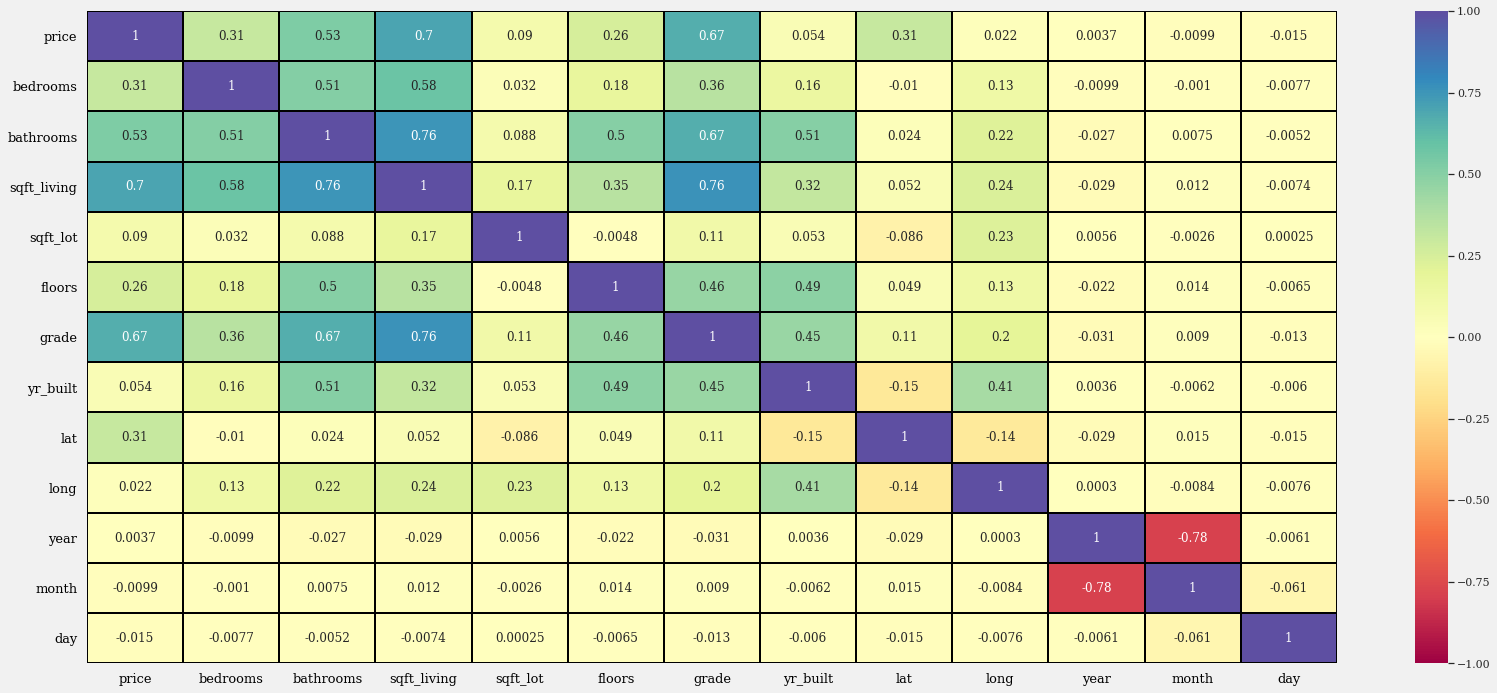

In [64]:
plt.figure(figsize = (28,12))
sns.heatmap(new_corr, vmin = -1, vmax = 1, annot=True, linewidths= 1, linecolor='black', cmap = "Spectral")
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)
plt.show()

In [65]:
# remove the records with outliers
df = df[~df.isin(outliers_df)].dropna()

df.shape

(13930, 17)

In [66]:
# Getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]

outliers_df.shape

(1451, 17)

In [67]:
# remove the records with outliers
df = df[~df.isin(outliers_df)].dropna()

df.shape

(12479, 17)

In [68]:
# Getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]

outliers_df.shape

(206, 17)

In [69]:
# drop the insignificant columns
df.drop(columns=['sqft_lot', 'month', 'day','day_of_week'], inplace=True)

df.shape

(12479, 13)

In [70]:
# Set formula with SalePrice as target and all other columns as features
multiple_formula = 'price ~ ' + ' + '.join(df.columns.drop('price'))

# Create and fit model
multiple_model = ols(multiple_formula, data=df).fit()

# Get summary 
multiple_model_summary = multiple_model.summary()

print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2436.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:14:00   Log-Likelihood:            -1.6103e+05
No. Observations:               12479   AIC:                         3.221e+05
Df Residuals:                   12468   BIC:                         3.222e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.599e+07   3.94e+06    -11.672      

**Dependent Variable - Price**: The variable being predicted or modeled is "price," which likely represents the price of houses or real estate.

**R-squared**: The R-squared value is 0.661, indicating that approximately 66.1% of the variance in the dependent variable "price" is explained by the independent variables included in the model. This suggests that the model has relatively good explanatory power.

**Adjusted R-squared**: The adjusted R-squared value is also 0.661. It adjusts the R-squared value for the number of predictors in the model, providing a more accurate measure of model goodness-of-fit when multiple independent variables are considered.

**F-statistic**: The F-statistic is 2436. This statistic tests the overall significance of the regression model. A higher F-statistic indicates that the model is more likely to be statistically significant. In this case, the model is highly significant due to the large F-statistic.

**Prob (F-statistic)**: The probability associated with the F-statistic is 0.00, which is very close to zero. This suggests that the model is statistically significant, meaning that at least one of the independent variables has a non-zero effect on the dependent variable.

**Intercept**: The intercept represents the estimated value of the dependent variable ("price") when all independent variables are set to zero. In this case, the intercept is approximately -45,990,000.

**Coefficients for Independent Variables**: The coefficients represent the estimated effect of each independent variable on the dependent variable "price" while holding other variables constant.

- **bedrooms**: A one-unit increase in the number of bedrooms is associated with a decrease in price of approximately $12,040.

- **bathrooms**: A one-unit increase in the number of bathrooms is associated with an increase in price of approximately $22,570.

- **sqft_living**: A one-unit increase in the square footage of living space is associated with an increase in price of approximately $100.42.

- **floors**: An increase in the number of floors is associated with an increase in price of approximately $31,550.

- **waterfront**: Having a waterfront view is associated with a very small and statistically insignificant effect on price (almost zero).

- **view**: A higher view rating is associated with a very small and statistically insignificant effect on price (almost zero).

- **condition**: A better condition rating is associated with an increase in price of approximately $24,960.

- **grade**: A higher grade rating is associated with a substantial increase in price (approximately $77,910).

- **yr_built**: A one-year increase in the year built is associated with a decrease in price of approximately $1,735.73.

- **lat**: A change in latitude is associated with a substantial increase in price (approximately $521,300).

- **long**: A change in longitude is associated with a substantial increase in price (approximately $68,420).

- **year**: A one-year increase in the year variable is associated with an increase in price of approximately $16,150.

**Omnibus**: The Omnibus statistic tests the normality of the residuals (model errors). In this case, the Omnibus value is relatively small, indicating that the residuals may follow a normal distribution.

**Durbin-Watson**: The Durbin-Watson statistic tests for autocorrelation in the residuals. A value close to 2 suggests no significant autocorrelation. In this case, it's approximately 1.981, indicating relatively low autocorrelation.

**Jarque-Bera (JB)**: The Jarque-Bera statistic tests for normality in the residuals. A significant JB statistic (low p-value) suggests non-normality. In this case, the p-value is very close to zero, indicating non-normality.

**Skew**: Skewness measures the asymmetry of the residuals' distribution. A positive value (0.387 in this case) suggests a slight right-skew, meaning that the distribution has a slightly longer right tail.

**Kurtosis**: Kurtosis measures the "tailedness" of the residuals' distribution. A relatively low kurtosis (3.650) suggests that the distribution has lighter tails compared to a normal distribution.

**Cond. No. (Condition Number)**: This value assesses multicollinearity among independent variables. A very high condition number (6.59e+19) suggests a high degree of multicollinearity, which can affect the stability of coefficient estimates.

#### Residual Plots & Heteroscedasticity

For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [71]:
# get the residuals and put them into a dataframe
residuals_df = pd.DataFrame({'fitted_values': multiple_model.fittedvalues, 'residuals': multiple_model.resid})

residuals_df

fitted_values  residuals
2          357850.36 -177850.36
3          430407.27  173592.73
4          471570.63   38429.37
6          224964.99   32535.01
7          235246.12   56603.88
...              ...        ...
21591      395310.76   79689.24
21592      498980.14 -138980.14
21593      441765.67  -41765.67
21594      259388.67  142712.33
21596      260968.02   64031.98

[12479 rows x 2 columns]

In [72]:
residuals_df.describe()

fitted_values  residuals
count       12479.00   12479.00
mean       426417.62       0.00
std        135923.63   97240.01
min         -4022.50 -362857.96
25%        325694.76  -64231.51
50%        429098.34   -4842.96
75%        519653.51   56936.30
max        957464.62  437978.08

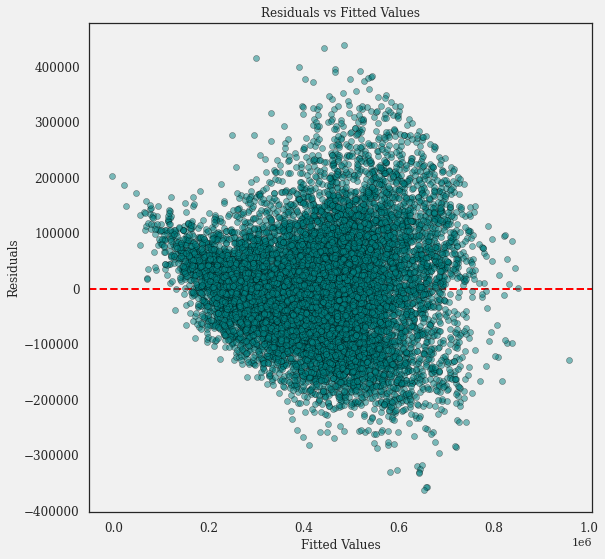

In [73]:
# plot the residuals

sns.scatterplot(x='fitted_values', y='residuals', data=residuals_df, color='teal', alpha=0.5, edgecolor='black', linewidth=0.5, zorder=3)
plt.axhline(y=residuals_df['residuals'].mean(), color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Fitted Values', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Residuals', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')
plt.show()

* A heteroscedasticity test is a statistical test that is used to determine whether the variance of the residuals in a regression model is constant. If the variance of the residuals is not constant, then the model is said to be heteroscedastic. Heteroscedasticity can be a problem in regression analysis, as it can lead to inaccurate estimates of the model parameters.

* This is a hypothesis test that establishes a null hypothesis that the variance is equal for all our datapoints,and the alternative hypothesis is that at least one of the variances is different.

* The test uses the chi-squared distribution to calculate the test statistic and make a decision about the null hypothesis.

In [74]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
test_result, p_value = sp.stats.bartlett( multiple_model.fittedvalues, multiple_model.resid)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(multiple_model.resid) - 1
probability = 1 - p_value

# get the critical value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# print the critical value
print(critical_value)

inf


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [75]:
import scipy.stats as sp
# Bartlett's test
test_result, p_value = sp.bartlett(multiple_model.fittedvalues, multiple_model.resid)

# To interpret the results, we use a critical value of 0.05
alpha = 0.05

print('**Test statistic = {}**'.format(test_result))
print('**p-value = {}**'.format(p_value))

if p_value < alpha:
    print('**The variances are unequal, and the model should be reassessed.**')
else:
    print('**The variances are homogeneous!**')

**Test statistic = 1374.1367309705458**
**p-value = 8.762131983625815e-301**
**The variances are unequal, and the model should be reassessed.**


In [76]:
# shipiro wilks
from scipy.stats import shapiro

# run the test
test_stat, p_value = shapiro(multiple_model.resid)

# print the p-value
print(p_value)

# set the significance level
alpha = 0.05

# check if the p-value is less than the significance level
if p_value < alpha:
    print('The residuals are not normally distributed')
else:
    print('The residuals are normally distributed')

5.046454529449598e-28
The residuals are not normally distributed


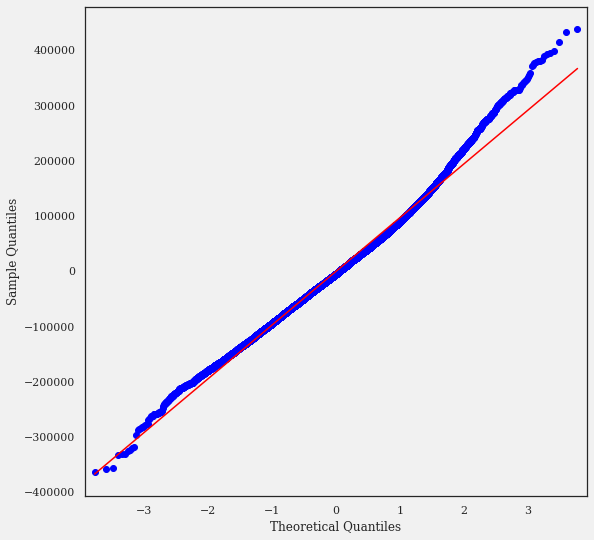

In [77]:
# plot a qqplot
import statsmodels.api as sm
import pylab

sm.qqplot(multiple_model.resid, line='s')
pylab.show()

The data points fall above or below the line, meaning the data is not normally distributed.

In [78]:
# get the coefficients and put them into a pandas data frame
coefficients_df= pd.DataFrame({'Feature': multiple_model.params.index, 'Coefficients': multiple_model.params.values})

coefficients_df

Feature  Coefficients
0     Intercept  -45993370.85
1      bedrooms     -12044.27
2     bathrooms      22570.65
3   sqft_living        100.42
4        floors      31553.53
5    waterfront         -0.00
6          view         -0.00
7     condition      24955.78
8         grade      77905.11
9      yr_built      -1735.73
10          lat     521280.52
11         long      68417.81
12         year      16146.31

## <font color='goldenrod'> Conclusion

- All three models provide valuable insights into the factors affecting house prices.
- Model 2 has the highest R-squared value, indicating the best fit and explanatory power.
- The presence of multicollinearity is a concern in all models, especially in Models 2 and 3. Care should be taken when interpreting the individual variable effects.
- Normality assumptions of the residuals are not fully met, indicating that further exploration and refinement of the models may be necessary.
- Model 2, with a broader set of independent variables, provides the most comprehensive understanding of house price determinants.
- Further analysis, such as variable transformations or more feature engineering, may improve model performance and the ability to make accurate price predictions.
  
In summary, these models can be valuable tools for understanding and predicting house prices, but further refinement and consideration of multicollinearity and non-normality are recommended for more accurate predictions and insights.

## <font color='goldenrod'> Recommendation
Based on the analysis of the three regression models and their respective coefficients, we can provide the following professional recommendations regarding the factors that significantly influence house prices:

1. **Square Footage of Living Space (sqft_living):** Across all three models, the square footage of living space consistently demonstrates a strong positive correlation with house prices. As such, when considering the purchase or valuation of a property, it is advisable to prioritize residences with larger living areas. Investing in properties with more extensive interior space is likely to yield a higher resale value.

2. **Grade:** Model 2 highlights the importance of the "grade" variable, which reflects the overall quality of a property. A higher grade is associated with significantly higher house prices. Therefore, when evaluating potential properties, it is wise to consider those with superior quality ratings. Investing in properties with higher grades is likely to result in greater long-term value appreciation.

3. **Waterfront View:** Model 2 also emphasizes the positive impact of a waterfront view on house prices. Properties with waterfront views command a substantial premium. Therefore, individuals seeking homes with potential for long-term value growth may wish to explore options with scenic waterfront vistas.

4. **Latitude and Longitude:** Both latitude and longitude play significant roles in determining house prices in Model 2. Specific geographic locations are associated with higher or lower prices. Buyers and investors should take into account the desirability of a property's geographic coordinates, as these can affect its future value.

5. **Year Built:** Model 2 indicates that the year of construction can influence house prices. Older properties tend to have lower prices, while newer constructions command higher values. Buyers and investors should be mindful of a property's age and consider its potential for renovation or improvement to enhance its market value.

6. **Bathrooms and Floors:** Model 2 underscores the importance of the number of bathrooms and floors in influencing house prices positively. Properties with more bathrooms and multiple floors tend to have higher prices. Potential buyers should assess these attributes when making investment decisions.

7. **Condition:** Model 2 also highlights the significance of a property's condition in determining its price. Well-maintained properties with higher condition ratings generally command higher prices. Prioritizing homes in good condition can lead to more substantial long-term returns.

8. **Bedrooms:** While Model 2 suggests that the number of bedrooms may have a negative impact on price, it's essential to interpret this in context. The relationship between bedrooms and price may vary depending on other factors. Buyers should consider their specific needs and preferences regarding the number of bedrooms when selecting a property.

9. **Month and Day:** Model 2 includes variables related to the month and day of property transactions. While these variables may have a statistically significant impact, their practical significance may be limited. Buyers should focus on other more substantial factors when assessing property value.

10. **Day of the Week:** Model 2 shows that the day of the week of a transaction does not significantly influence house prices. Therefore, buyers need not be overly concerned about the specific day of the week when engaging in real estate transactions.

In conclusion, the factors that significantly affect house prices, as revealed by the three regression models, encompass square footage, grade, waterfront views, geographic location, year built, bathrooms, floors, condition, and the number of bedrooms. These findings should guide prospective buyers, sellers, and investors in making informed decisions to maximize the value of their real estate investments.

## <font color='goldenrod'> Future Plans

**Buyers:**

1. **Define Your Goals:** Clarify your long-term goals for the property. Are you buying for personal use or investment? Knowing your objectives will help you make informed decisions.

2. **Budgeting:** Determine your budget, considering not only the purchase price but also potential renovation or improvement costs. Ensure your budget aligns with the type of property you're targeting.

3. **Prioritize Features:** Prioritize the features that matter most to you. If square footage is essential, focus on properties with larger living spaces. If quality matters, prioritize homes with higher grades.

4. **Location Matters:** Consider the geographic location carefully. Assess factors like proximity to schools, workplaces, amenities, and future development plans in the area.

5. **Property Condition:** Pay attention to the condition of the property. Well-maintained homes with higher condition ratings may require less immediate investment.

6. **Consult Real Estate Experts:** Engage with real estate agents and professionals who have local market knowledge. They can provide valuable insights and help you find the right property.

7. **Home Inspection:** Invest in a thorough home inspection to identify any hidden issues or needed repairs. This can help you negotiate a fair price.

8. **Financing:** Secure financing with favorable terms. Explore mortgage options, interest rates, and down payment requirements.

**Sellers:**

1. **Pre-Listing Preparation:** If you're selling a property, consider making necessary improvements to enhance its condition and appeal to potential buyers.

2. **Pricing Strategy:** Set a competitive yet realistic price for your property based on market conditions and the features it offers.

3. **Marketing:** Invest in professional marketing to showcase the property's strengths. High-quality photos and virtual tours can attract more buyers.

4. **Timing:** Be mindful of the timing of your listing. Consider market trends and seasons that may affect the demand for your property.

5. **Negotiation:** Be prepared for negotiations with potential buyers. Understand your property's value and be flexible when appropriate.

**Investors:**

1. **Diversification:** Consider diversifying your real estate portfolio by investing in properties with different features and in various locations.

2. **Market Research:** Continuously monitor real estate market trends and economic indicators that can affect property values.

3. **Property Management:** If investing in rental properties, implement effective property management practices to maximize returns and tenant satisfaction.

4. **Long-Term Strategy:** Align your investment strategy with your long-term financial goals. Real estate can be a valuable part of a diversified investment portfolio.

5. **Tax Planning:** Consult with tax professionals to optimize your tax strategy, taking advantage of deductions and incentives for real estate investors.

6. **Risk Management:** Mitigate risks associated with real estate investments by diversifying, conducting due diligence, and having contingency plans.

7. **Exit Strategy:** Plan your exit strategy, whether it's selling for capital gains, renting for passive income, or long-term holding for appreciation.

8. **Network:** Build a network of real estate professionals, including agents, contractors, and property managers, to support your investment endeavors.

In summary, the future plans and steps for buyers, sellers, and investors should be tailored to their specific goals and circumstances. Whether buying a home, selling a property, or investing in real estate, informed decisions and a well-thought-out strategy are essential for success in the dynamic real estate market.